# Analysis of AMEO Data


# Introduction

# Dataset Description


The Aspiring Mind Employment Outcome 2015 (AMEO) dataset, published by Aspiring Minds, centers on employment outcomes among engineering graduates. It contains key variables like Salary, Job Titles, and Job Locations, along with standardized scores reflecting cognitive, technical, and personality skills. Spanning approximately 40 independent variables and 4000 data points, the dataset comprises a mix of continuous and categorical data. Additionally, demographic attributes and individual candidate identifiers are incorporated into the dataset.

# Objective


The objective of this Exploratory Data Analysis (EDA) is to thoroughly explore the given dataset, focusing on understanding the relationships between different variables and the target variable, Salary.

The primary objectives of this analysis are to:

1. Present a comprehensive overview of the dataset's attributes and characteristics.
2. Uncover discernible patterns or trends within the data.
3. Explore the connections between the independent variables and the target variable, salary.
4. Detect any anomalies or outliers present in the dataset.
5. Provide actionable insights and recommendations derived from the analysis.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/data (1).xlsx"

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.duplicated().sum()


0

In [7]:
df.nunique()


Unnamed: 0                  1
ID                       3998
Salary                    177
DOJ                        81
DOL                        67
Designation               419
JobCity                   339
Gender                      2
DOB                      1872
10percentage              851
10board                   275
12graduation               16
12percentage              801
12board                   340
CollegeID                1350
CollegeTier                 2
Degree                      4
Specialization             46
collegeGPA               1282
CollegeCityID            1350
CollegeCityTier             2
CollegeState               26
GraduationYear             11
English                   111
Logical                   107
Quant                     138
Domain                    243
ComputerProgramming        79
ElectronicsAndSemicon      29
ComputerScience            20
MechanicalEngg             42
ElectricalEngg             31
TelecomEngg                26
CivilEngg 

In [8]:
df = df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [9]:
df['DOL'].replace('present','2015-12-31', inplace = True)
df['DOL'] = pd.to_datetime(df['DOL'])
df['DOJ'] = pd.to_datetime(df['DOJ'])
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [10]:
dates = df[(df['DOL'] < df['DOJ'])].shape[0]
print(f'DOL is before than DOJ for {dates} observations.')
print(df.shape)

DOL is before than DOJ for 40 observations.
(3998, 35)


In [11]:
df = df.drop(df[(df['DOL'] < df['DOJ'])].index)


In [12]:
df.shape

(3958, 35)

**Validating the results are in GPA or not **

In [13]:
df.loc[df['collegeGPA']< 10,'collegeGPA'].index

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In the collegeGPA columns we have rows which are not in percentage format. Further we have to convert it in to a percentage by applying percentile formulao with index loc

In [14]:
df.loc[df['collegeGPA']< 10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100

In [15]:
df['collegeGPA']

0       78.00
1       70.06
2       70.00
3       74.64
4       73.90
        ...  
3993    61.50
3994    77.30
3995    70.00
3996    70.42
3997    68.00
Name: collegeGPA, Length: 3958, dtype: float64

**Validating if there exist 0 or -1 in the data**

In [19]:
print((df==0).sum()[(df==0).sum() > 0])


10board             350
12board             359
CollegeCityTier    2769
GraduationYear        1
dtype: int64


In [21]:
(df==-1).sum()[(df==-1).sum()>0]/len(df)*100

JobCity                  11.344113
Domain                    6.114199
ComputerProgramming      21.803941
ElectronicsAndSemicon    71.450227
ComputerScience          77.488631
MechanicalEngg           94.062658
ElectricalEngg           96.058615
TelecomEngg              90.601314
CivilEngg                98.938858
dtype: float64

This code snippet calculates the percentage of occurrences of the value -1 in each column of a DataFrame df.

In [22]:
df['10board'] = df['10board'].astype(str)
df['12board'] = df['12board'].astype(str)
df['JobCity'] = df['JobCity'].astype(str)

In [23]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})
df['MechanicalEngg'] = df['MechanicalEngg'].replace({-1:0})
df['ElectricalEngg'] = df['ElectricalEngg'].replace({-1:0})
df['TelecomEngg'] = df['TelecomEngg'].replace({-1:0})
df['CivilEngg'] = df['CivilEngg'].replace({-1:0})



In [24]:
df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [25]:
df["ComputerScience"].value_counts()

0      3067
407     127
376     122
346     116
438     108
469      79
315      77
500      64
284      48
530      45
253      30
561      22
223      14
592      14
623      10
653       9
192       2
715       2
684       1
130       1
Name: ComputerScience, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3958 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3958 non-null   int64         
 1   DOJ                    3958 non-null   datetime64[ns]
 2   DOL                    3958 non-null   datetime64[ns]
 3   Designation            3958 non-null   object        
 4   JobCity                3958 non-null   object        
 5   Gender                 3958 non-null   object        
 6   DOB                    3958 non-null   datetime64[ns]
 7   10percentage           3958 non-null   float64       
 8   10board                3958 non-null   object        
 9   12graduation           3958 non-null   int64         
 10  12percentage           3958 non-null   float64       
 11  12board                3958 non-null   object        
 12  CollegeTier            3958 non-null   int64         
 13  Deg

In [27]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

df

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,0,0,0,0,0,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,0,0,0,0,0,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,2015-12-31,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,0,0,0,0,0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,438,0,0,0,0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [26]:
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace = True)
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,2015-12-31,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,2015-12-31,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


# Replace missing values in categorical columns with the mode (most frequent value) of each respective column.

In [29]:
df['10board'].fillna(df['10board'].mode()[0], inplace=True)
df['12board'].fillna(df['12board'].mode()[0], inplace=True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace=True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace=True)


# Fill missing values in numerical columns with the median value of each respective column.

In [31]:
df['Domain'].fillna(df['Domain'].median(), inplace=True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace=True)

In [32]:
def correct_string_data(data):
    '''
   Transform the text-based categories to lowercase and eliminate any leading
    or trailing spaces, if present.

    '''
    df[data] = df[data].str.lower().str.strip()

Certainly! Let me explain the function `correct_string_data(data)` step by step:

1. `df1[data].str.lower()`: This part of the code converts all the strings in the specified column `data` to lowercase using the `str.lower()` method. For example, if the column contains strings like "Hello" or "WORLD", this operation will convert them to "hello" and "world", respectively.

2. `.str.strip()`: This method removes any leading or trailing whitespace characters from each string in the column. This ensures that there are no unwanted spaces at the beginning or end of the strings. For example, if a string is "   hello  ", it will be transformed into "hello" after applying `str.strip()`.

3. `df1[data] = ...`: This assigns the modified column back to the DataFrame `df1`, replacing the original column with the corrected values.



In [41]:
categorical_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']


In [42]:
for col in categorical_columns:
    print(f'Number of unique values in {col} without inconsistency : {df[col].nunique()}')

Number of unique values in Designation without inconsistency : 417
Number of unique values in JobCity without inconsistency : 337
Number of unique values in 10board without inconsistency : 274
Number of unique values in 12board without inconsistency : 339
Number of unique values in Specialization without inconsistency : 46
Number of unique values in CollegeState without inconsistency : 26


since we have large number of unique categories in categorical columns we  retain only the top 10 most frequent categories, classifying all others as "other".

In [44]:
df['Designation'].nunique()

417

In [45]:
def unique_categories(df, data):
    # Get the top 10 most frequent categories
    top_categories = df[data].value_counts().index[:10].tolist()

    # Replace less frequent categories with 'other'
    df.loc[~df[data].isin(top_categories), data] = 'other'


In [47]:
for cols in categorical_columns:
    unique_categories(df, cols)

In [49]:
for column in categorical_columns:
    print(f"\nTop 10 categories in: {column}\n")
    print(df[column].value_counts().head(10))
    print("\n" + '*'*100)



Top 10 categories in: Designation

other                         2269
software engineer              537
software developer             263
system engineer                203
programmer analyst             139
systems engineer               117
java software engineer         109
software test engineer         100
project engineer                77
technical support engineer      73
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

Bangalore    1075
other         991
Noida         362
Hyderabad     331
Pune          287
Chennai       270
New Delhi     196
Gurgaon       194
Mumbai        108
Kolkata        98
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1729
state board                     1146
other                           

# Feature Engineering
We compute the age of individuals in the dataset as of 2015 by subtracting their year of birth (DOB year) from 2015.

In [50]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = 2015 - df['DOB'].dt.year
df.head()


,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age
0,420000,2012-06-01,2015-12-31,other,Bangalore,f,1990-02-19,84.3,other,2007,...,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25
1,500000,2013-09-01,2015-12-31,other,other,m,1989-10-04,85.4,cbse,2007,...,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26
4,200000,2014-03-01,2015-03-01,other,other,m,1991-02-27,78.0,cbse,2008,...,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24


### Generate a 'Tenure' column indicating the duration of employment from the 'Date_of_Joining' column until the year 2015.

In [55]:
df['Tenurity'] = (df['DOL'] - df['DOJ']).dt.days
# Calculate tenure in months
df['Tenurity'] = ((df['DOL'] - df['DOJ']) / np.timedelta64(1, 'M')).astype(int)

# Calculate tenure in years
df['Tenurity'] = ((df['DOL'] - df['DOJ']) / np.timedelta64(1, 'Y')).astype(int)


In [56]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Tenure,Tenurity
0,420000,2012-06-01,2015-12-31,other,Bangalore,f,1990-02-19,84.3,other,2007,...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,25,3,3
1,500000,2013-09-01,2015-12-31,other,other,m,1989-10-04,85.4,cbse,2007,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,26,2,2
2,325000,2014-06-01,2015-12-31,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,23,1,1
3,1100000,2011-07-01,2015-12-31,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,26,4,4
4,200000,2014-03-01,2015-03-01,other,other,m,1991-02-27,78.0,cbse,2008,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,24,0,0


Dropping the rows where the graduationyear is greater than or equal to date of joining


In [58]:
(df['GraduationYear'] > df['DOJ'].dt.year).sum()


79

In [59]:
df = df.drop(df[(df['GraduationYear'] > df['DOJ'].dt.year)].index)


#Univariate Analysis


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

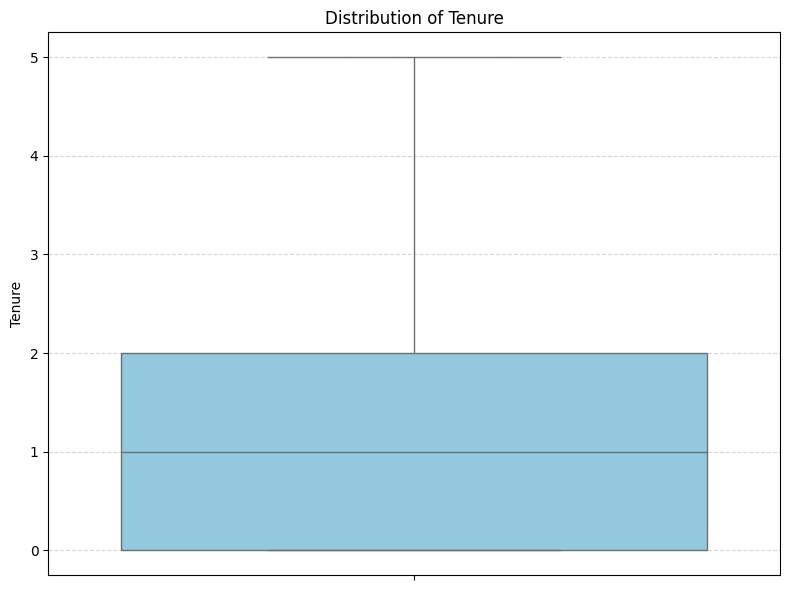

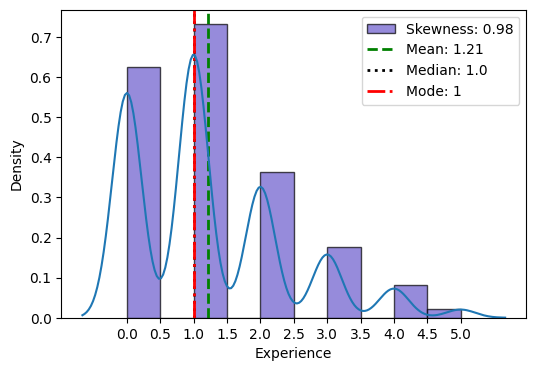

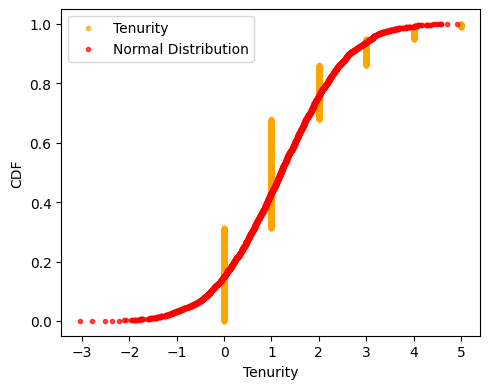

In [78]:
# Tenurity

#Boxplot

plt.figure(figsize=(8, 6))
sns.boxplot(y='Tenurity', data=df, color='skyblue')
plt.title('Distribution of Tenure')
plt.ylabel('Tenure')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#Histplot

# Define bins
bins = np.arange(0, df['Tenurity'].max() + 0.5, 0.5)

# Plot histogram with KDE
plt.figure(figsize=(6, 4))
plt.hist(df['Tenurity'], ec='k', bins=bins, color='slateblue', alpha=0.7,
         label=f"Skewness: {round(df['Tenurity'].skew(), 2)}", density=True)
plt.xticks(ticks=np.arange(0, df['Tenurity'].max() + 0.5, 0.5))
plt.xlabel('Experience')
plt.ylabel('Density')

# Add vertical lines for mean, median, and mode
for line, color, linestyle, label in zip([df['Tenure'].mean(), df['Tenure'].median(), df['Tenure'].mode()[0]],
                                         ['green', 'k', 'red'],
                                         ['--', ':', '-.'],
                                         ['Mean', 'Median', 'Mode']):
    plt.axvline(line, label=f"{label}: {round(line, 2)}", linestyle=linestyle, color=color, linewidth=2)

# Plot KDE
sns.kdeplot(df['Tenure'])

# Add legend
plt.legend()

# Show plot
plt.show()

#CDF
# Define function for cumulative distribution function (CDF)
def cdf(data):
    sorted_data = np.sort(data)
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    return sorted_data, cdf

# Calculate CDF for Tenurity column
x_tenure, y_tenure = cdf(df['Tenurity'])

# Generate a sample from normal distribution with same mean and standard deviation as Tenurity column
x_sample_tenure = np.sort(np.random.normal(df['Tenurity'].mean(), df['Tenurity'].std(), size=len(df['Tenurity'])))
y_sample_tenure = np.arange(1, len(x_sample_tenure) + 1) / len(x_sample_tenure)

# Plotting
plt.figure(figsize=(5, 4))
plt.plot(x_tenure, y_tenure, linestyle='None', marker='.', color='orange', alpha=0.7, label='Tenurity')
plt.plot(x_sample_tenure, y_sample_tenure, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('Tenurity')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()




1. **Histogram**: The distribution of tenure among respondents is positively skewed, indicating that a majority of respondents have relatively shorter tenure. About half of the respondents have a tenure below 1.5 years, with an average tenure of 1.5 years. The mean, median, and mode of the distribution are closely clustered together, and the skewness coefficient of 0.6 suggests a moderate deviation from a perfectly normal distribution.

2. **Box Plot**: The box plot reveals the presence of outliers in the data, particularly with regard to respondents with longer tenures. These outliers represent a few individuals with exceptionally lengthy tenures compared to the rest of the dataset.

3. **CDF**: The Cumulative Distribution Function (CDF) analysis indicates that the distribution of tenure does not conform to a normal distribution. The observed distribution of tenure deviates significantly from the expected normal distribution pattern, suggesting that tenure among respondents is not normally distributed.

#Salary

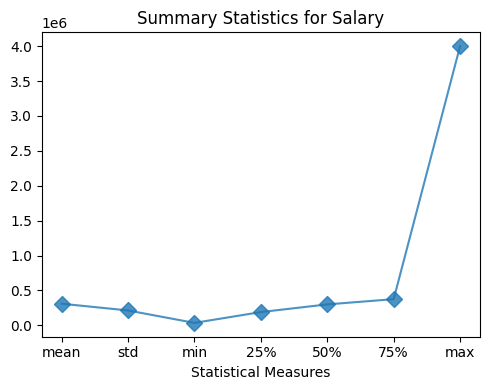

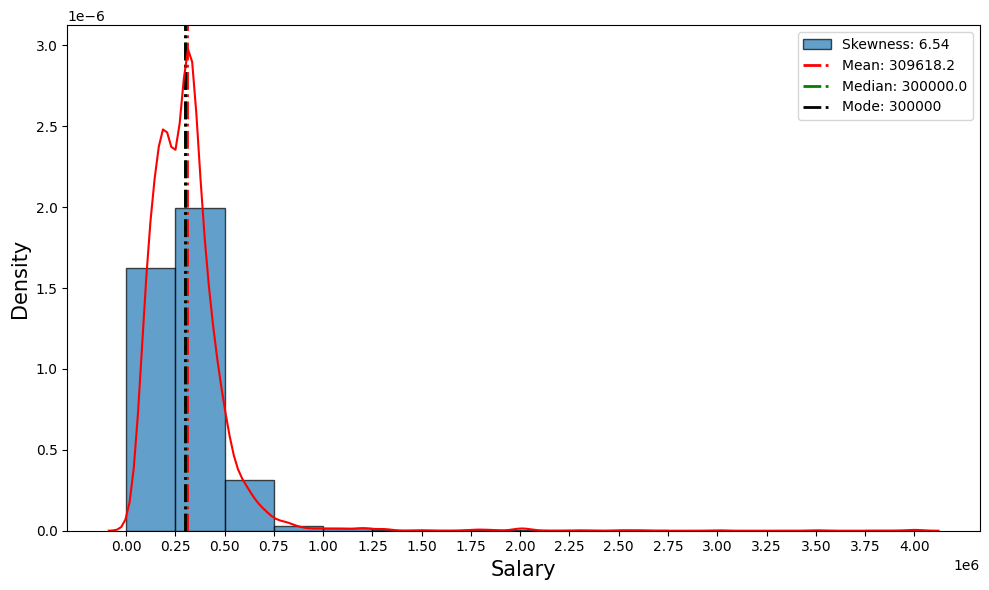

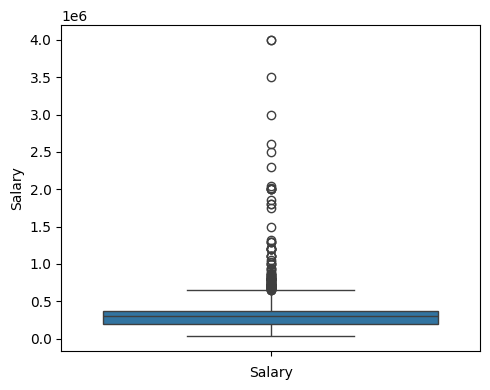

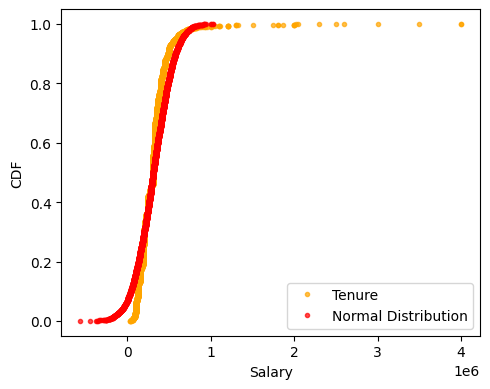

In [80]:


# Summary Statistics for Salary
plt.figure(figsize=(5, 4))
df['Salary'].describe()[1:].plot(alpha=0.8, marker='D', markersize=8)
plt.title('Summary Statistics for Salary')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram with Mean, Median, Mode, and KDE
bins = np.arange(0, df['Salary'].max()+250000, 250000)
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['Salary'].skew(), 2)}")
plt.axvline(df['Salary'].mean(), label=f"Mean: {round(df['Salary'].mean(), 2)}", linestyle='-.', color='red', linewidth=2)
plt.axvline(df['Salary'].median(), label=f"Median: {round(df['Salary'].median(), 2)}", linestyle='-.', color='green', linewidth=2)
plt.axvline(df['Salary'].mode()[0], label=f"Mode: {round(df['Salary'].mode()[0], 2)}", linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['Salary'], color='red')
plt.xticks(bins)
plt.xlabel('Salary', size=15)
plt.ylabel('Density', size=15)
plt.legend()
plt.tight_layout()
plt.show()

# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(df['Salary'])
plt.xlabel('Salary')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5, 4))
x_salary, y_salary = cdf(df['Salary'])
x_sample_salary, y_sample_salary = cdf(np.random.normal(df['Salary'].mean(), df['Salary'].std(), size=len(df['Salary'])))
plt.plot(x_salary, y_salary, linestyle='None', marker='.', color='orange', alpha=0.7, label='Tenure')
plt.plot(x_sample_salary, y_sample_salary, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('Salary')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()


Histogram: The data distribution is heavily skewed to the right, with a skewness value of approximately 6, indicating a substantial departure from a normal distribution. Despite this skewness, the central tendency measures such as mean, median, and mode remain relatively close to each other.

Box Plot: The box plot illustrates a concentration of data points towards the higher end of the salary scale, suggesting a prevalence of high salary values within the dataset.

CDF: The Cumulative Distribution Function (CDF) underscores the significant skewness present in the data, showcasing a notable deviation from the expected normal distribution pattern. This skewness indicates that the data distribution is heavily influenced by extreme values, resulting in a non-symmetrical distribution.



#10th Percentage

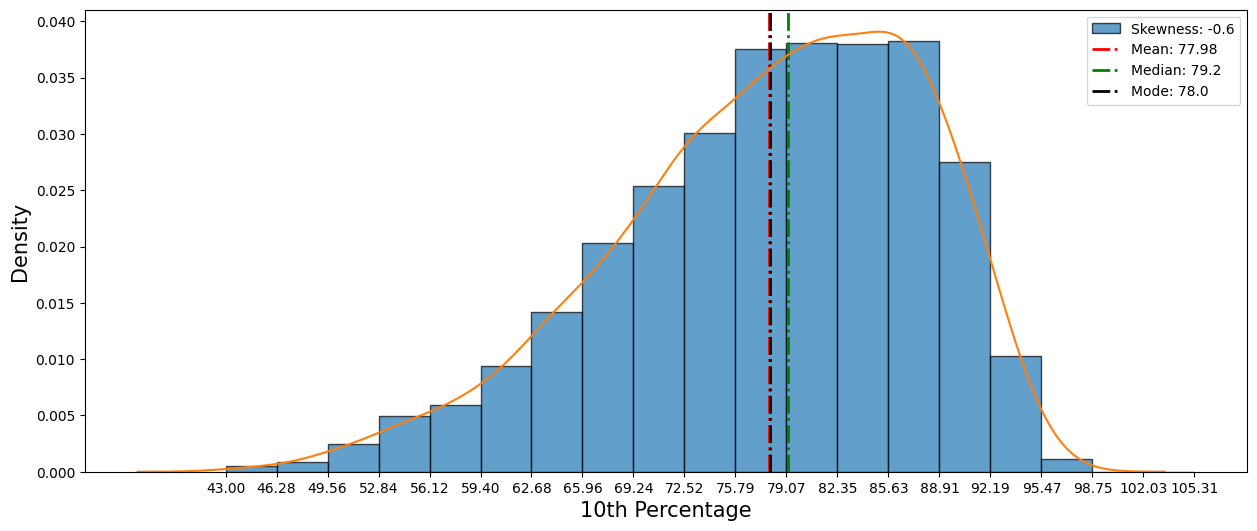

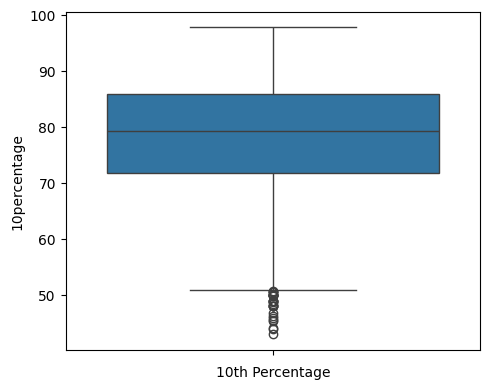

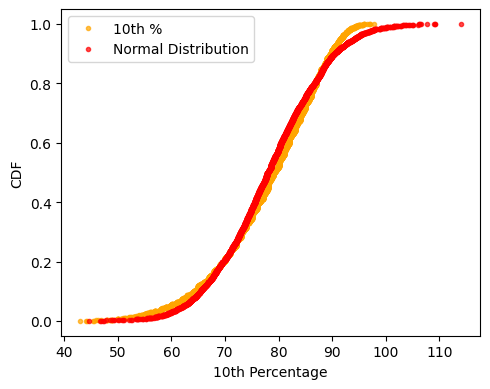

In [81]:
# Histogram
bins = np.arange(df['10percentage'].min(), df['10percentage'].max() + df['10percentage'].std(), df['10percentage'].std() / 3)
plt.figure(figsize=(15, 6))
plt.hist(df['10percentage'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['10percentage'].skew(), 2)}")
plt.xticks(bins)
plt.xlabel('10th Percentage', size=15)
plt.ylabel('Density', size=15)
plt.axvline(df['10percentage'].mean(), label=f"Mean: {round(df['10percentage'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['10percentage'].median(), label=f"Median: {round(df['10percentage'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['10percentage'].mode()[0], label=f"Mode: {round(df['10percentage'].mode()[0], 2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['10percentage'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(df['10percentage'])
plt.xlabel('10th Percentage')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5, 4))
x_10, y_10 = cdf(df['10percentage'])
x_sample_10, y_sample_10 = cdf(np.random.normal(df['10percentage'].mean(), df['10percentage'].std(), size=len(df['10percentage'])))
plt.plot(x_10, y_10, linestyle='None', marker='.', color='orange', alpha=0.7, label='10th %')
plt.plot(x_sample_10, y_sample_10, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('10th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

1. **Histogram**: The histogram illustrates a notable absence of students with low percentages, with the majority clustered within the 75% to 90% range. The peak frequency is observed around 78%, and the average score is approximately 77%.

2. **Box Plot**: The box plot reveals the presence of a few extreme outliers, indicating a handful of students with unusually low or high percentages compared to the majority.

3. **CDF**: The Cumulative Distribution Function (CDF) highlights some skewness in the data, suggesting that it deviates from a normal distribution pattern. This skewness indicates that the distribution is not symmetrical and is influenced by non-typical values.

#12th Percentage

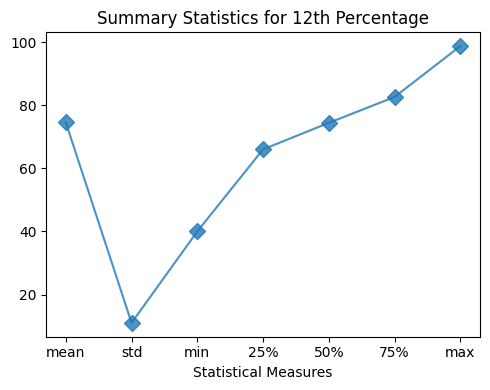

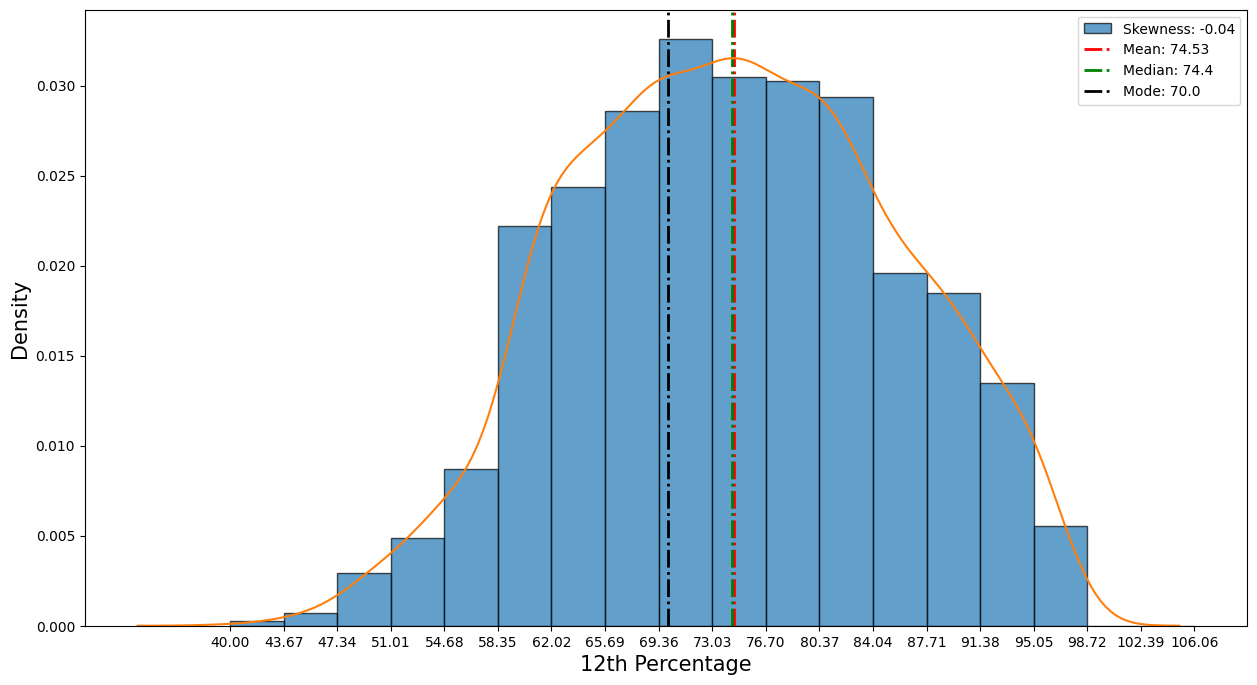

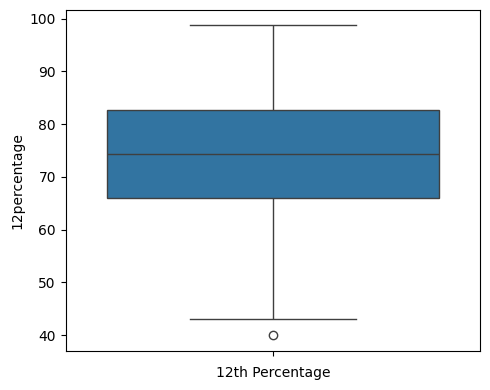

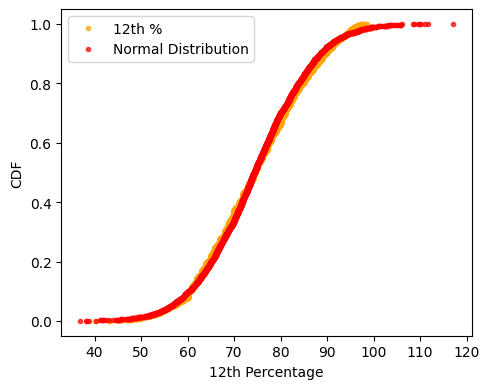

In [82]:
# Summary Statistics for 12th Percentage
plt.figure(figsize=(5, 4))
df['12percentage'].describe()[1:].plot(alpha=0.8, marker='D', markersize=8)
plt.title('Summary Statistics for 12th Percentage')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram
bins = np.arange(df['12percentage'].min(), df['12percentage'].max() + df['12percentage'].std(), df['12percentage'].std() / 3)
plt.figure(figsize=(15, 8))
plt.hist(df['12percentage'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['12percentage'].skew(), 2)}")
plt.xticks(bins)
plt.xlabel('12th Percentage', size=15)
plt.ylabel('Density', size=15)
plt.axvline(df['12percentage'].mean(), label=f"Mean: {round(df['12percentage'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['12percentage'].median(), label=f"Median: {round(df['12percentage'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['12percentage'].mode()[0], label=f"Mode: {round(df['12percentage'].mode()[0], 2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['12percentage'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(df['12percentage'])
plt.xlabel('12th Percentage')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5, 4))
x_12, y_12 = cdf(df['12percentage'])
x_sample_12, y_sample_12 = cdf(np.random.normal(df['12percentage'].mean(), df['12percentage'].std(), size=len(df['12percentage'])))
plt.plot(x_12, y_12, linestyle='None', marker='.', color='orange', alpha=0.7, label='12th %')
plt.plot(x_sample_12, y_sample_12, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('12th Percentage')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

1. **Histogram**: The histogram highlights a limited number of students with lower percentages, with the majority achieving scores between 69% and 84%. The highest frequency is observed around 70%, with the average score approximately at 74%.

2. **Box Plot**: The box plot reveals just one data point with an exceptionally low score, indicating an outlier among the dataset.

3. **CDF**: The Cumulative Distribution Function (CDF) demonstrates that the data does not conform to a normal distribution pattern.

#CollegeGPA

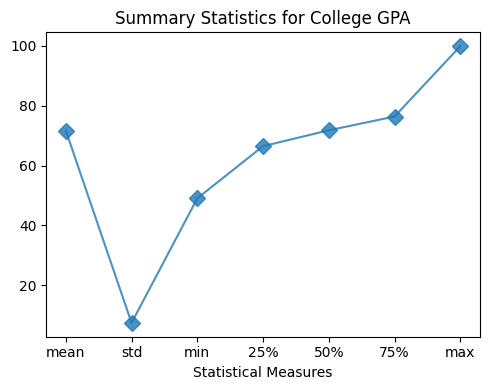

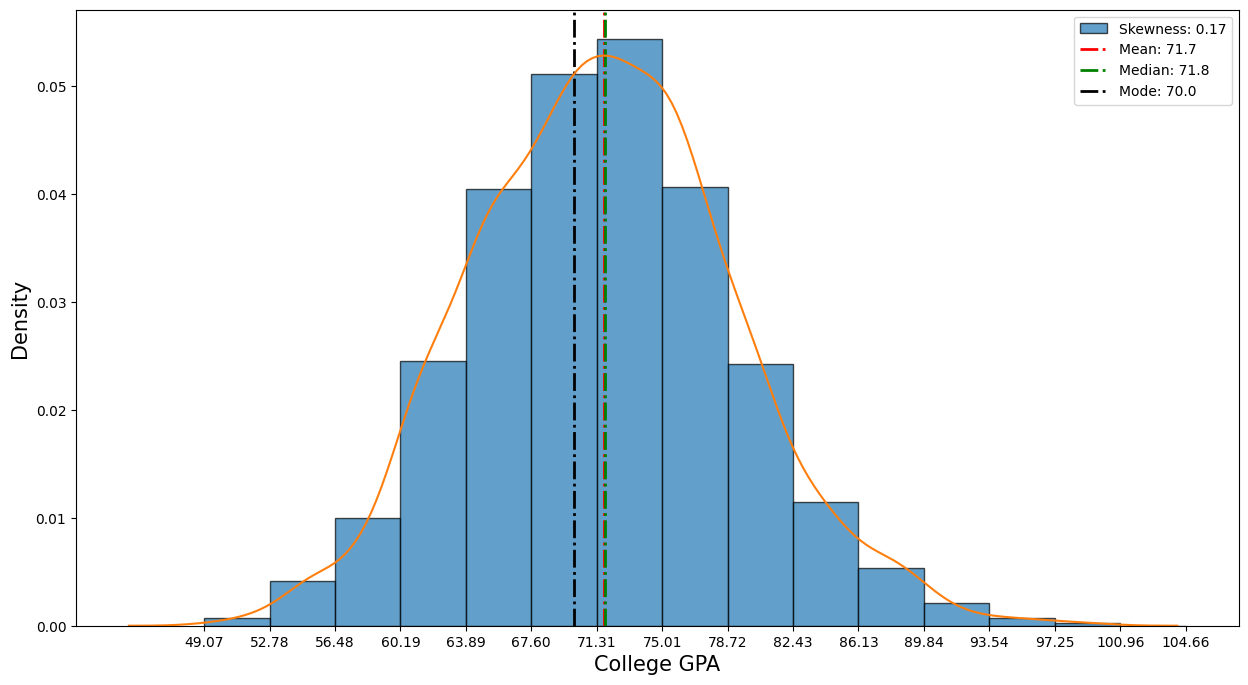

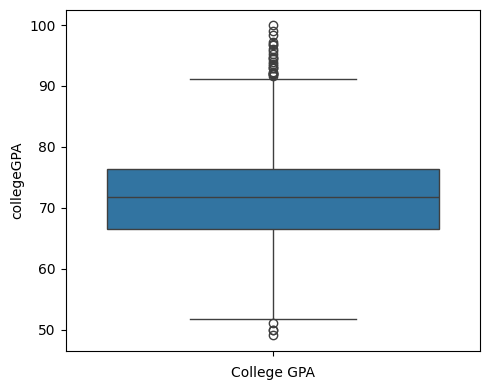

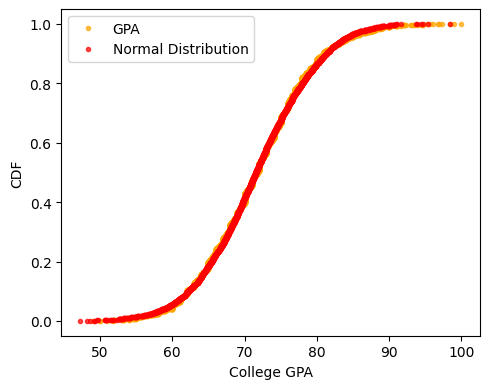

In [83]:
# Summary Statistics for College GPA
plt.figure(figsize=(5, 4))
df['collegeGPA'].describe()[1:].plot(alpha=0.8, marker='D', markersize=8)
plt.title('Summary Statistics for College GPA')
plt.xlabel('Statistical Measures')
plt.tight_layout()
plt.show()

# Histogram
bins = np.arange(df['collegeGPA'].min(), df['collegeGPA'].max() + df['collegeGPA'].std(), df['collegeGPA'].std() / 2)
plt.figure(figsize=(15, 8))
plt.hist(df['collegeGPA'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['collegeGPA'].skew(), 2)}")
plt.xticks(bins)
plt.xlabel('College GPA', size=15)
plt.ylabel('Density', size=15)
plt.axvline(df['collegeGPA'].mean(), label=f"Mean: {round(df['collegeGPA'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['collegeGPA'].median(), label=f"Median: {round(df['collegeGPA'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['collegeGPA'].mode()[0], label=f"Mode: {round(df['collegeGPA'].mode()[0], 2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['collegeGPA'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5, 4))
sns.boxplot(df['collegeGPA'])
plt.xlabel('College GPA')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5, 4))
x_gpa, y_gpa = cdf(df['collegeGPA'])
x_sample_gpa, y_sample_gpa = cdf(np.random.normal(df['collegeGPA'].mean(), df['collegeGPA'].std(), size=len(df['collegeGPA'])))
plt.plot(x_gpa, y_gpa, linestyle='None', marker='.', color='orange', alpha=0.7, label='GPA')
plt.plot(x_sample_gpa, y_sample_gpa, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('College GPA')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

1. **Histogram**: The histogram indicates that most students obtained GPAs between 63% and 78%, with the peak frequency occurring around 70%. On average, the GPA stands at approximately 74%.

2. **Box Plot**: The box plot displays the existence of both low and high extreme values within the dataset, suggesting the presence of outliers.

3. **CDF**: Further analysis of the cumulative distribution function (CDF) is needed to understand the overall distribution pattern of the data.

#English

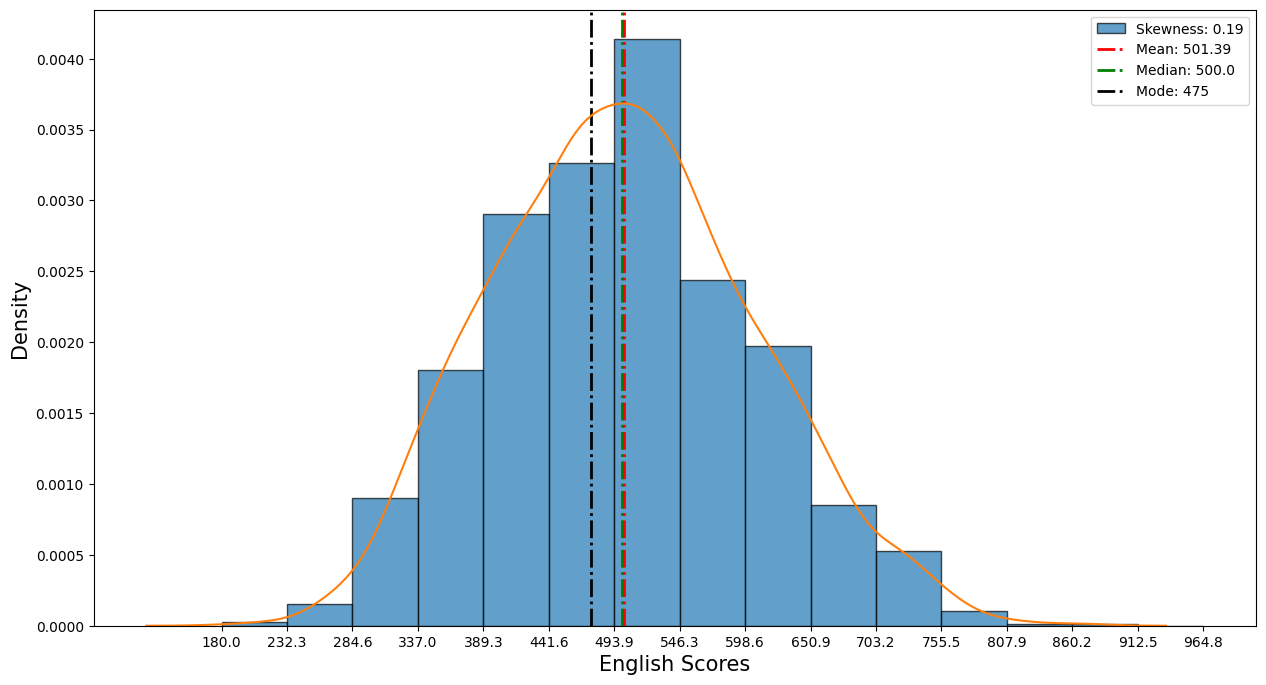

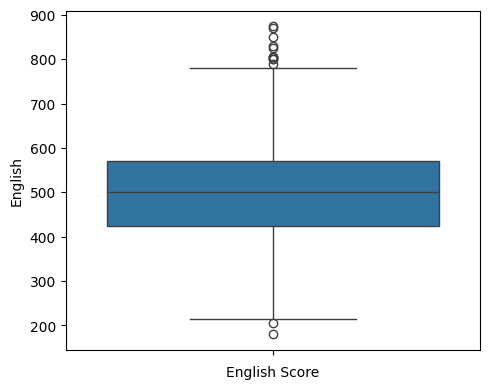

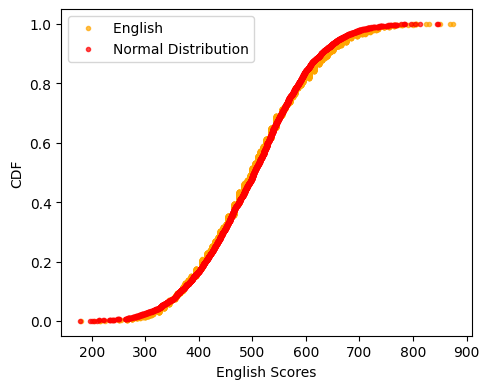

In [85]:


# Histogram
bins = np.arange(df['English'].min(), df['English'].max() + df['English'].std(), df['English'].std() / 2)
plt.figure(figsize=(15,8))
plt.hist(df['English'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['English'].skew(), 2)}")
plt.xticks(bins)
plt.xlabel('English Scores', size=15)
plt.ylabel('Density', size=15)
plt.axvline(df['English'].mean(), label=f"Mean: {round(df['English'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['English'].median(), label=f"Median: {round(df['English'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['English'].mode()[0], label=f"Mode: {round(df['English'].mode()[0], 2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['English'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5,4))
sns.boxplot(df['English'])
plt.xlabel('English Score')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5,4))
x_eng, y_eng = cdf(df['English'])
x_sample_eng, y_sample_eng = cdf(np.random.normal(df['English'].mean(), df['English'].std(), size=len(df['English'])))
plt.plot(x_eng, y_eng, linestyle='None', marker='.', color='orange', alpha=0.7, label='English ')
plt.plot(x_sample_eng, y_sample_eng, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('English Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

Histogram: The majority of scores clustered between 389 and 545, with the peak observed at 475. On average, the score stands at 502.

Box Plot: The presence of both lower and higher extreme values is apparent in the distribution representation.

CDF: The data exhibits a reasonably normal distribution pattern.


Logical
---



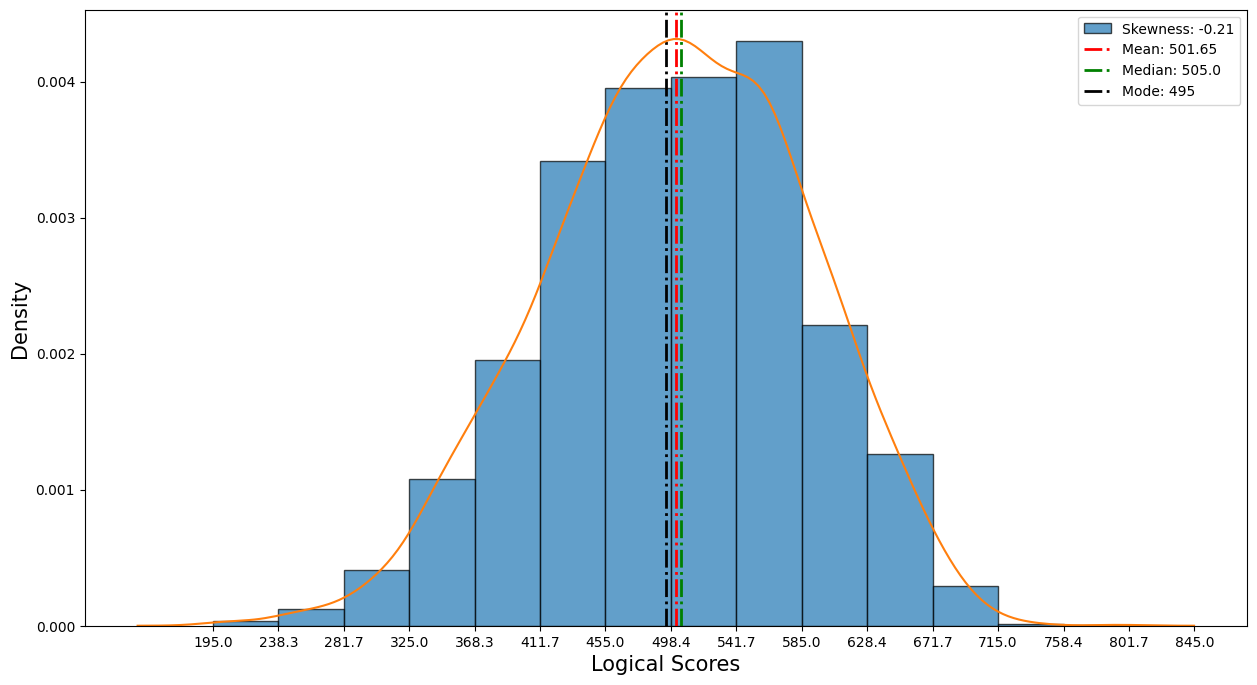

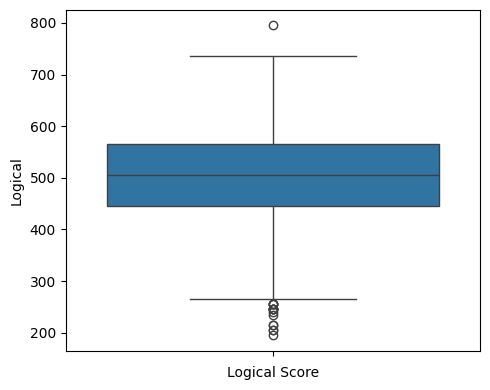

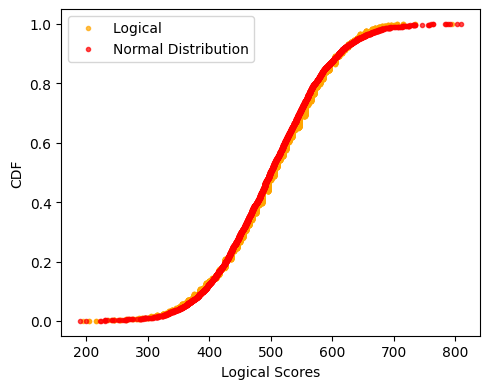

In [86]:
# Histogram
bins = np.arange(df['Logical'].min(), df['Logical'].max() + df['Logical'].std(), df['Logical'].std() / 2)
plt.figure(figsize=(15,8))
plt.hist(df['Logical'], ec='k', bins=bins, alpha=0.7, density=True,
         label=f"Skewness: {round(df['Logical'].skew(), 2)}")
plt.xticks(bins)
plt.xlabel('Logical Scores', size=15)
plt.ylabel('Density', size=15)
plt.axvline(df['Logical'].mean(), label=f"Mean: {round(df['Logical'].mean(), 2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['Logical'].median(), label=f"Median: {round(df['Logical'].median(), 2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['Logical'].mode()[0], label=f"Mode: {round(df['Logical'].mode()[0], 2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['Logical'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5,4))
sns.boxplot(df['Logical'])
plt.xlabel('Logical Score')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5,4))
x_log, y_log = cdf(df['Logical'])
x_sample_log, y_sample_log = cdf(np.random.normal(df['Logical'].mean(), df['Logical'].std(), size=len(df['Logical'])))
plt.plot(x_log, y_log, linestyle='None', marker='.', color='orange', alpha=0.7, label='Logical ')
plt.plot(x_sample_log, y_sample_log, linestyle='None', marker='.', color='red', alpha=0.7, label='Normal Distribution')
plt.xlabel('Logical Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()

Histogram: The majority of scores were concentrated between 454 and 584, with the highest frequency observed at 495. On average, the score stood at 502.

Box Plot: Lower extreme values are apparent, with only one notable high extreme value.

CDF: The data distribution pattern is not described.

#Quant

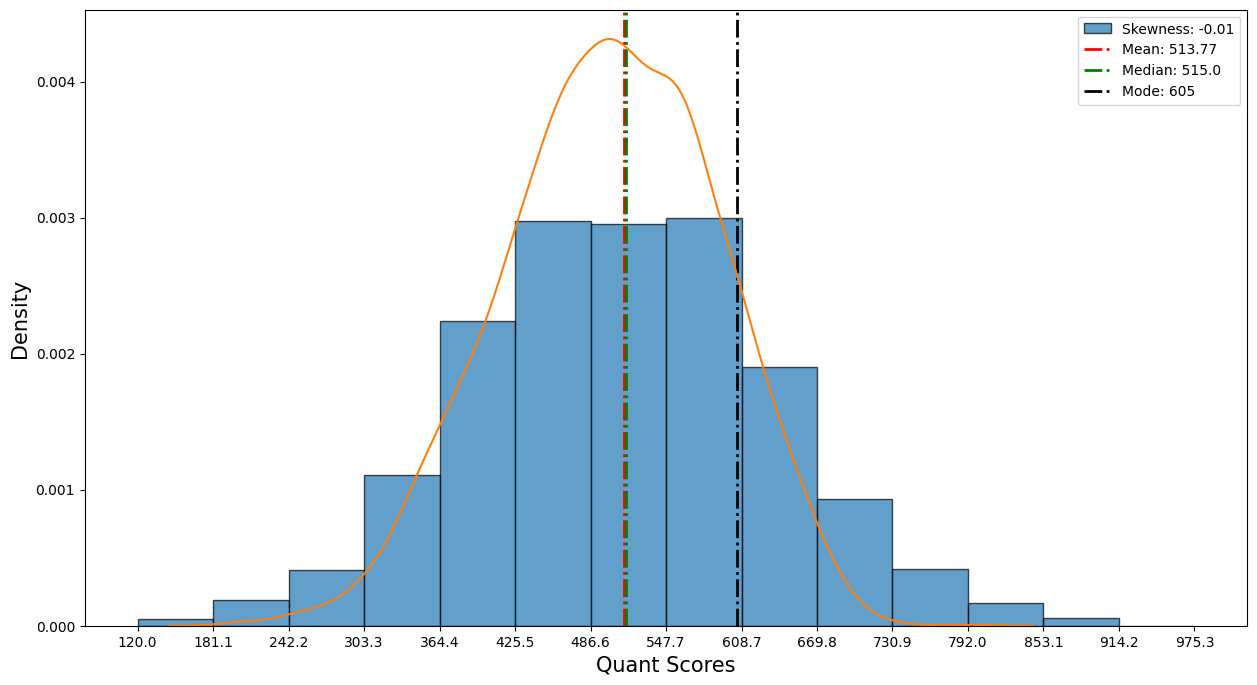

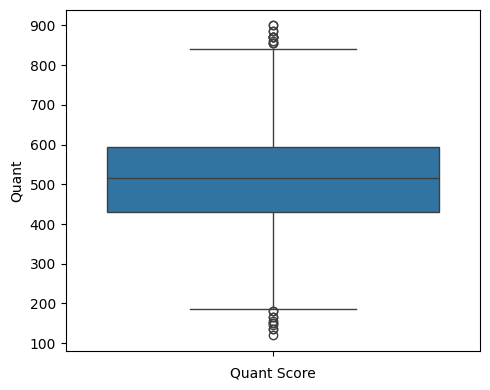

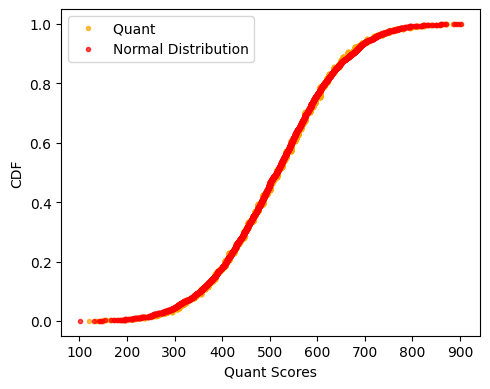

In [87]:
# Histogram
bins = np.arange(df['Quant'].min(), df['Quant'].max()+df['Quant'].std(),
                 df['Quant'].std()/2)
plt.figure(figsize=(15,8))
plt.hist(df['Quant'], ec='k',
         bins=bins,
         label=f"Skewness: {round(df['Quant'].skew(), 2)}",
         alpha=0.7,
         density=True)
plt.xticks(bins)
plt.xlabel('Quant Scores', size=15)
plt.ylabel('Density', size=15)

plt.axvline(df['Quant'].mean(), label=f"Mean: {round(df['Quant'].mean(), 2)}",
            linestyle='-.',
            color='red', linewidth=2)
plt.axvline(df['Quant'].median(), label=f"Median: {round(df['Quant'].median(), 2)}",
            linestyle='-.',
            color='green', linewidth=2)
plt.axvline(df['Quant'].mode()[0], label=f"Mode: {round(df['Quant'].mode()[0], 2)}",
            linestyle='-.',
            color='k', linewidth=2)
sns.kdeplot(df['Logical'])
plt.legend()
plt.show()

# Box Plot
plt.figure(figsize=(5,4))
sns.boxplot(df['Quant'])
plt.xlabel('Quant Score')
plt.tight_layout()
plt.show()

# CDF
plt.figure(figsize=(5,4))
x_q, y_q = cdf(df['Quant'])
x_sample_q , y_sample_q = \
    cdf(np.random.normal(df['Quant'].mean(), df['Quant'].std(), size=len(df['Quant'])))
plt.plot(x_q, y_q, linestyle='None',
         marker='.', color='orange',
         alpha=0.7, label='Quant ')
plt.plot(x_sample_q, y_sample_q, linestyle='None',
         marker='.', color='red',
         alpha=0.7, label='Normal Distribution')
plt.xlabel('Quant Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()


Histogram: The bulk of the scores ranged between 425 and 608, with the highest frequency observed at 605 and an average score of 513.
Box Plot: Both lower and higher extreme values are evident from the box plot.
CDF: The data closely approximates a normal distribution.

#Computer Programming


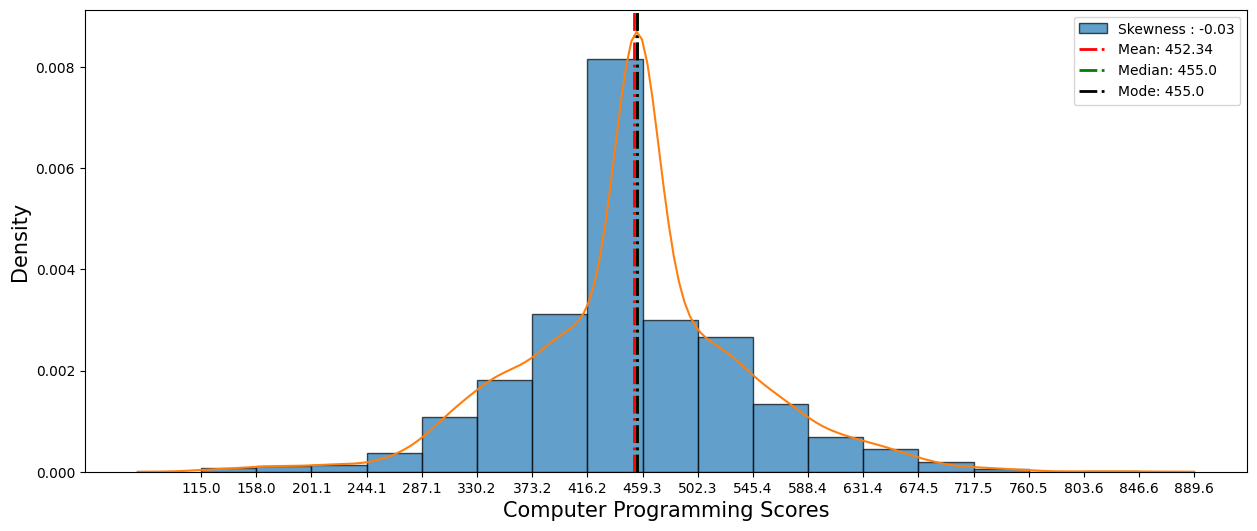

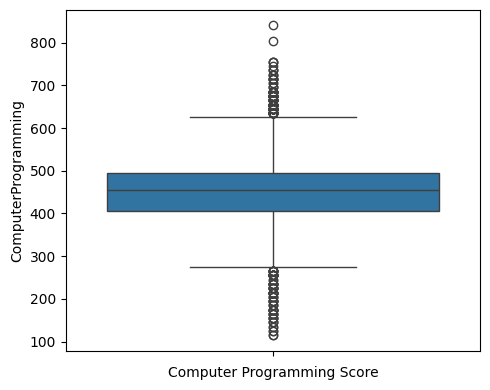

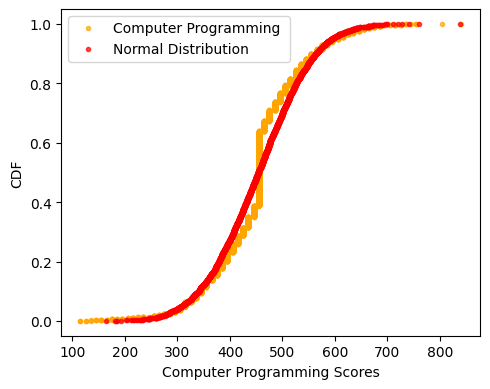

In [88]:
# Histogram

bins = np.arange(df['ComputerProgramming'].min(), df['ComputerProgramming'].max()+df['ComputerProgramming'].std(),
                 df['ComputerProgramming'].std()/2)
plt.figure(figsize=(15, 6))
plt.hist(df['ComputerProgramming'], ec='k',
         bins=bins,
         label=f"Skewness : {round(df['ComputerProgramming'].skew(),2)}",
         alpha=0.7,
         density=True)
plt.xticks(bins)
plt.xlabel('Computer Programming Scores', size=15)
plt.ylabel('Density', size=15)

plt.axvline(df['ComputerProgramming'].mean(), label=f"Mean: {round(df['ComputerProgramming'].mean(),2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['ComputerProgramming'].median(), label=f"Median: {round(df['ComputerProgramming'].median(),2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['ComputerProgramming'].mode()[0], label=f"Mode: {round(df['ComputerProgramming'].mode()[0],2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['ComputerProgramming'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(df['ComputerProgramming'])
plt.xlabel('Computer Programming Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5, 4))
x_cp, y_cp = cdf(df['ComputerProgramming'])
x_sample_cp, y_sample_cp = \
    cdf(np.random.normal(df['ComputerProgramming'].mean(), df['ComputerProgramming'].std(), size=len(df['ComputerProgramming'])))
plt.plot(x_cp, y_cp, linestyle='None',
         marker='.', color='orange',
         alpha=0.7, label='Computer Programming ')
plt.plot(x_sample_cp, y_sample_cp, linestyle='None',
         marker='.', color='red',
         alpha=0.7, label='Normal Distribution')
plt.xlabel('Computer Programming Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()


Histogram: The bulk of the scores fell within the range of 416 to 459, with the highest frequency observed at 455. On average, students scored around 452 in computer programming.

Box Plot: The box plot reveals the presence of multiple low extreme values as well as high extreme values, indicating variability in the dataset.

CDF: The data does not conform to a normal distribution pattern, indicating deviations from the expected distribution.

#Electronics & Semiconductors

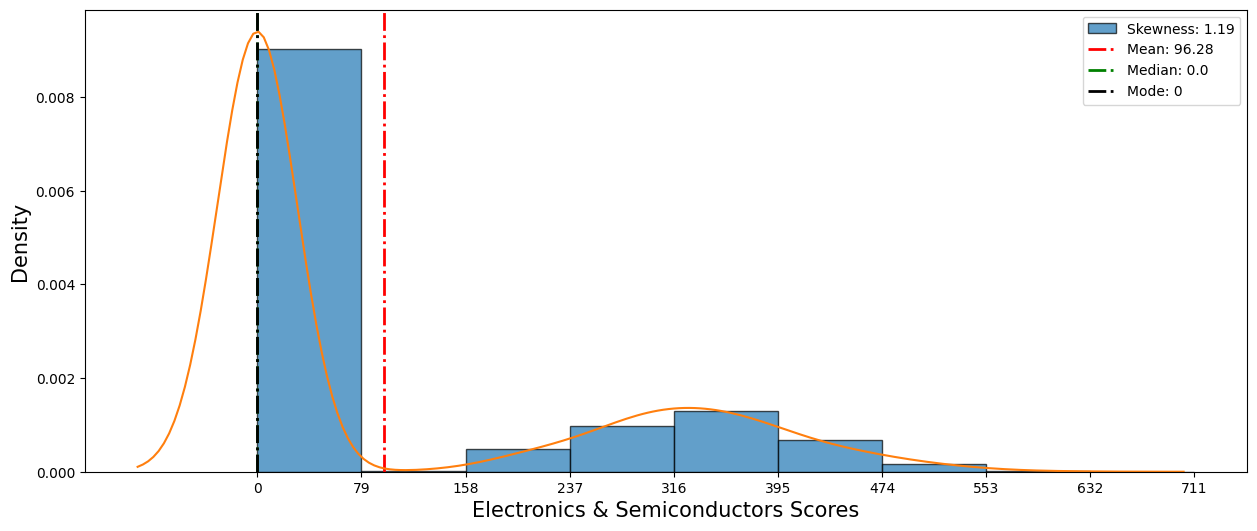

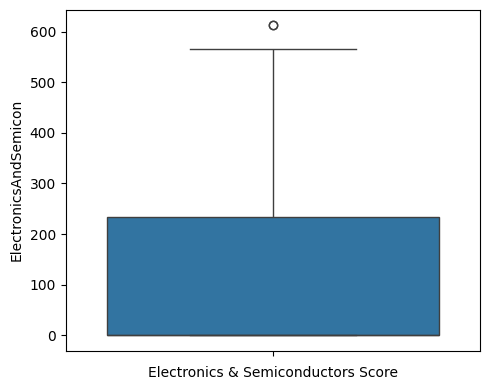

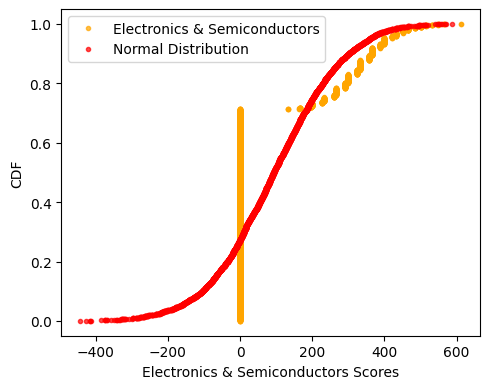

In [91]:
# Histogram

bins = np.arange(df['ElectronicsAndSemicon'].min(), df['ElectronicsAndSemicon'].max()+df['ElectronicsAndSemicon'].std(),
                 df['ElectronicsAndSemicon'].std()/2)
plt.figure(figsize=(15,6))
plt.hist(df['ElectronicsAndSemicon'], ec='k',
         bins=bins,
         label=f"Skewness: {round(df['ElectronicsAndSemicon'].skew(),2)}",
         alpha=0.7,
         density=True)
plt.xticks(bins)
plt.xlabel('Electronics & Semiconductors Scores', size=15)
plt.ylabel('Density', size=15)

plt.axvline(df['ElectronicsAndSemicon'].mean(), label=f"Mean: {round(df['ElectronicsAndSemicon'].mean(),2)}",
            linestyle='-.', color='red', linewidth=2)
plt.axvline(df['ElectronicsAndSemicon'].median(), label=f"Median: {round(df['ElectronicsAndSemicon'].median(),2)}",
            linestyle='-.', color='green', linewidth=2)
plt.axvline(df['ElectronicsAndSemicon'].mode()[0], label=f"Mode: {round(df['ElectronicsAndSemicon'].mode()[0],2)}",
            linestyle='-.', color='k', linewidth=2)
sns.kdeplot(df['ElectronicsAndSemicon'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5,4))
sns.boxplot(df['ElectronicsAndSemicon'])
plt.xlabel('Electronics & Semiconductors Score')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5,4))
x_es, y_es = cdf(df['ElectronicsAndSemicon'])
x_sample_es, y_sample_es = \
cdf(np.random.normal(df['ElectronicsAndSemicon'].mean(), df['ElectronicsAndSemicon'].std(), size=len(df['ElectronicsAndSemicon'])))
plt.plot(x_es, y_es, linestyle='None',
         marker='.', color='orange',
         alpha=0.7, label='Electronics & Semiconductors')
plt.plot(x_sample_es, y_sample_es, linestyle='None',
         marker='.', color='red',
         alpha=0.7, label='Normal Distribution')
plt.xlabel('Electronics & Semiconductors Scores')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()


Histogram: The distribution of scores shows that the majority clustered between 0 and 79, with a notable peak at 0. The average score stands at 96.

Box Plot: Interestingly, the lowest score aligns with the median of the dataset, indicating a significant presence of lower scores.

CDF: The data diverges from a normal distribution pattern, suggesting non-normally distributed behavior.

#AGE

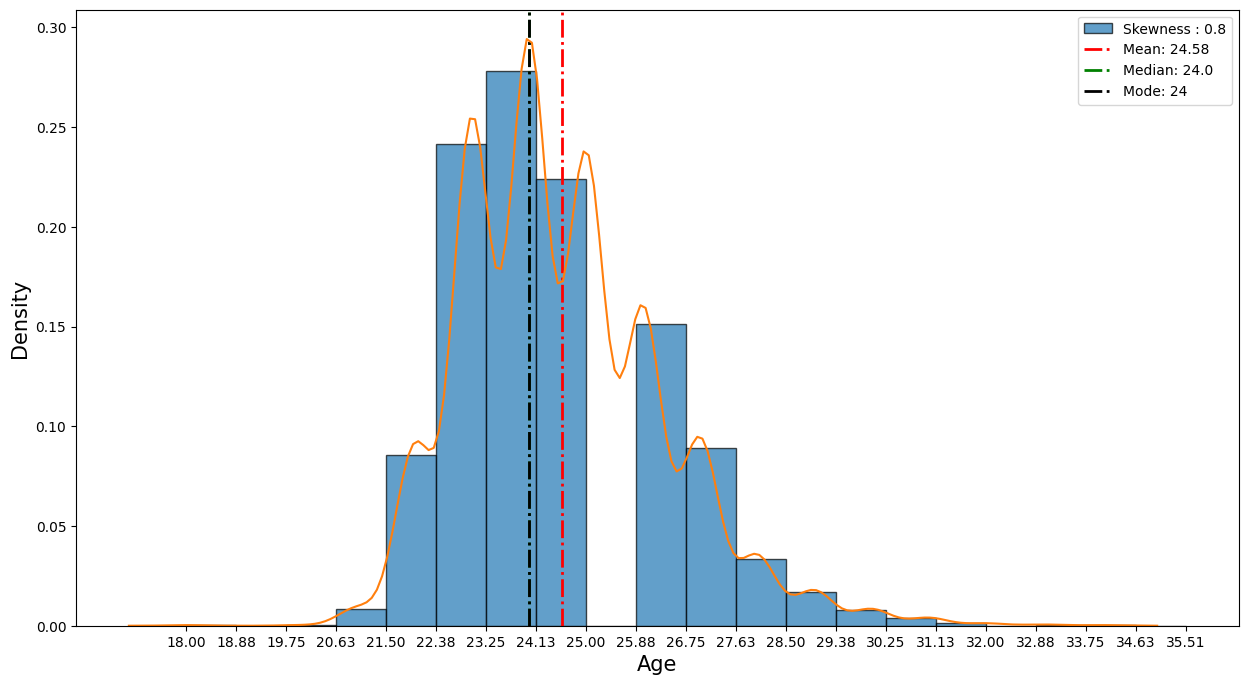

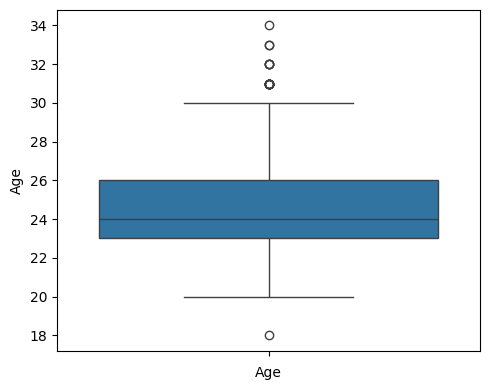

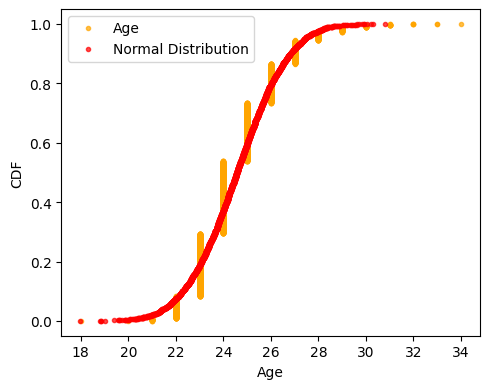

In [92]:
# Histogram

bins = np.arange(df['Age'].min(), df['Age'].max()+df['Age'].std(),
                 df['Age'].std()/2)
plt.figure(figsize=(15, 8))
plt.hist(df['Age'], ec='k',
         bins=bins,
         label=f"Skewness : {round(df['Age'].skew(), 2)}",
         alpha=0.7,
         density=True)
plt.xticks(bins)
plt.xlabel('Age', size=15)
plt.ylabel('Density', size=15)

plt.axvline(df['Age'].mean(), label=f"Mean: {round(df['Age'].mean(), 2)}",
            linestyle='-.',
            color='red', linewidth=2)
plt.axvline(df['Age'].median(), label=f"Median: {round(df['Age'].median(), 2)}",
            linestyle='-.',
            color='green', linewidth=2)
plt.axvline(df['Age'].mode()[0], label=f"Mode: {round(df['Age'].mode()[0], 2)}",
            linestyle='-.',
            color='k', linewidth=2)
sns.kdeplot(df['Age'])
plt.legend()
plt.show()

# Box Plot

plt.figure(figsize=(5, 4))
sns.boxplot(df['Age'])
plt.xlabel('Age')
plt.tight_layout()
plt.show()

# CDF

plt.figure(figsize=(5, 4))
x_cp, y_cp = cdf(df['Age'])
x_sample_cp, y_sample_cp = \
    cdf(np.random.normal(df['Age'].mean(), df['Age'].std(), size=len(df['Age'])))
plt.plot(x_cp, y_cp, linestyle='None',
         marker='.', color='orange',
         alpha=0.7, label='Age')
plt.plot(x_sample_cp, y_sample_cp, linestyle='None',
         marker='.', color='red',
         alpha=0.7, label='Normal Distribution')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.legend()
plt.tight_layout()
plt.show()


Histogram	The majority of students' ages ranged between 22 and 25. The mean, median, and mode ages are approximately 25.

Box Plot	The box plot indicates the presence of 4 students with very high ages and one with a very low age compared to other data points.

CDF	The age data does not follow a normal distribution pattern.

# Categorical Features
### Designation

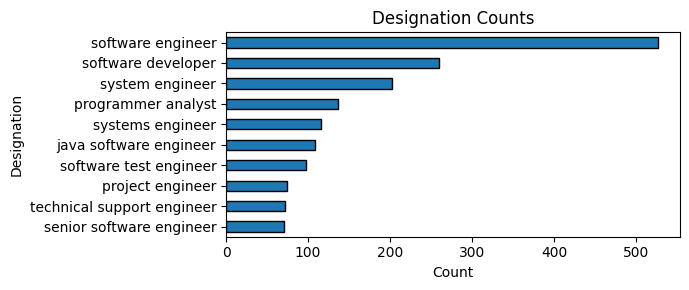

In [93]:
df['Designation'].value_counts()[1:].sort_values(
    ascending=True
).plot(
    kind='barh',
    title='Designation Counts',
    figsize=(7, 3),
    ec='k'
)
plt.ylabel('Designation')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

The most prevalent job title among individuals is "Software Engineer," which is followed by "System Engineer" and "Software Developer."

#JobCity

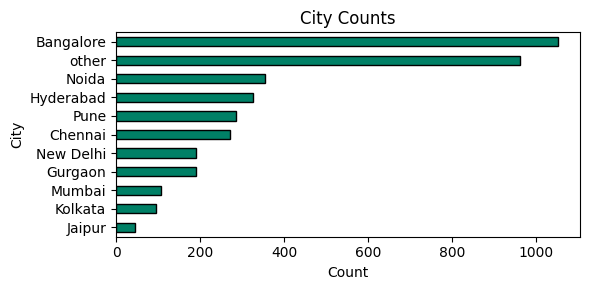

In [95]:
df['JobCity'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    cmap='summer',
    title='City Counts',
    figsize=(6,3),
    ec='k'
)
plt.ylabel('City')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Observations
The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least favourable.

#Gender

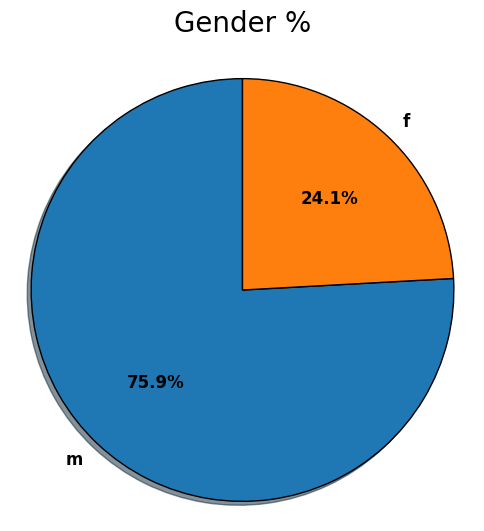

In [103]:
plt.figure(figsize=(6,6))
plt.pie(df['Gender'].value_counts().tolist(),
        labels=df['Gender'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k', 'linewidth': 1},
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        shadow=True,
        startangle=90)
plt.title('Gender %', pad=20, size=20)
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()


#Observations
The dataset is not balanced in terms of gender as the population of Male is really larger as compared to the female one

#10board & 12board

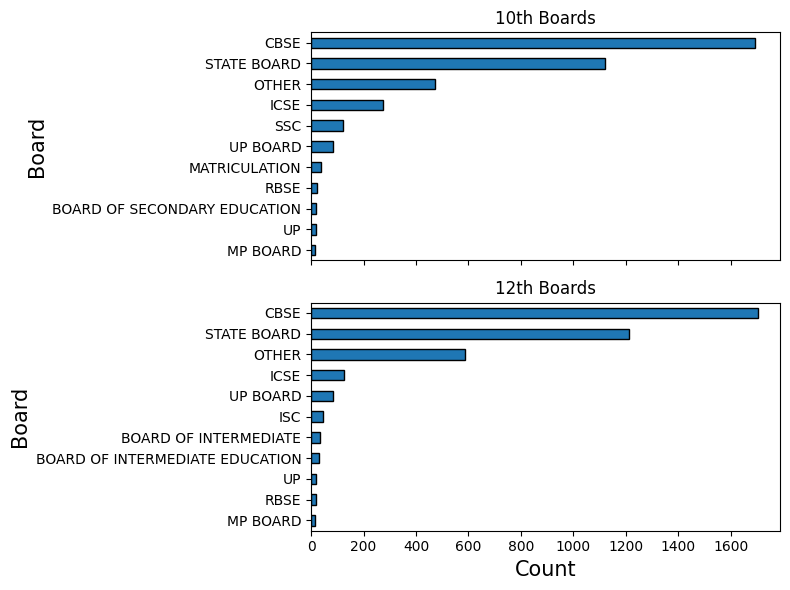

In [104]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

df['10board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[0],
    ec='k',
    title='10th Boards'
)
ax[0].set_ylabel('Board', size=15)

df['12board'].str.upper().value_counts().sort_values(ascending=True).plot(
    kind='barh',
    ax=ax[1],
    ec='k',
    title='12th Boards'
)
ax[1].set_ylabel('Board', size=15)
ax[1].set_xlabel('Count', size=15)

plt.tight_layout()
plt.show()

#Observations
CBSE is the most common school board for both 12th and 10th.

#CollegeTier

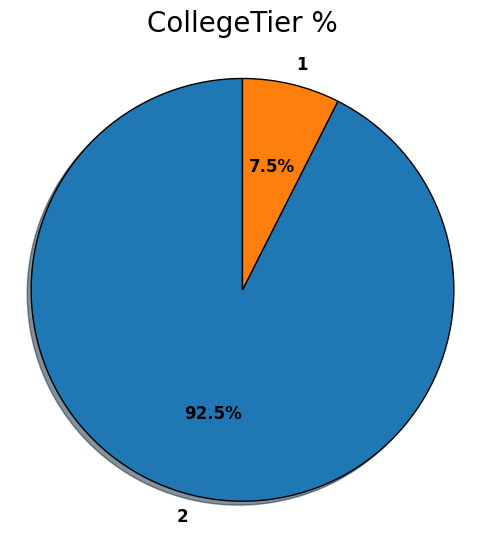

In [105]:
plt.figure(figsize=(6,6))
plt.pie(df['CollegeTier'].value_counts().tolist(),
        labels=df['CollegeTier'].value_counts().index,
        autopct='%1.1f%%',
        radius=1.5,
        wedgeprops={'edgecolor': 'k', 'linewidth': 1},
        textprops={'fontsize': 12, 'fontweight': 'bold'},
        shadow=True,
        startangle=90)
plt.title('CollegeTier %', pad=20, size=20)
plt.axis('equal')  # Ensures the pie chart is drawn as a circle
plt.show()


# Observations
Almost all the college belongs to Tier 1 only with a percentage of 92.5

#Degree

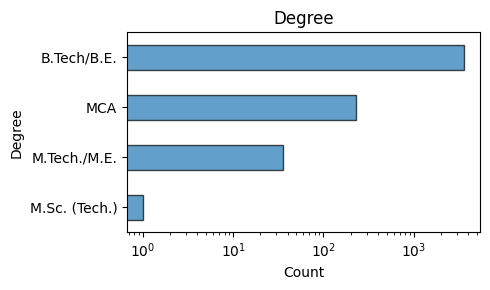

In [106]:
df['Degree'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Degree',
    figsize=(5, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Degree')
plt.xlabel('Count')
plt.xscale('log')
plt.tight_layout()
plt.show()

#Observations
Most of the students have done their graduation in B.Tech and there are very less students from M.Sc(Tech)

#CollegeCityTier

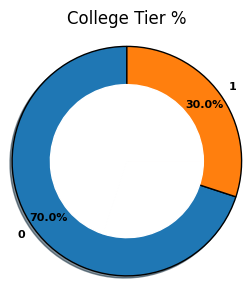

In [107]:
plt.figure(figsize=(3,3))
plt.pie(df['CollegeCityTier'].value_counts().tolist(), labels = df['CollegeCityTier'].value_counts().index,
       autopct = '%1.1f%%',
       radius = 1.5,
       wedgeprops = {'edgecolor':'k'},
       textprops = {'fontsize':8,'fontweight':'bold'},
       shadow = True,
       startangle = 90,
       pctdistance = 0.84)
plt.pie(df['CollegeCityTier'].value_counts().tolist(), colors = ['white'],
        wedgeprops = {'edgecolor':'white'},
       radius = 1)
plt.title('College Tier %',pad = 30, size = 12)
plt.margins(0.02)
plt.tight_layout()
plt.show()

# Observations
Majority of the colleges are form Tier 0 city.

#GraduationYear

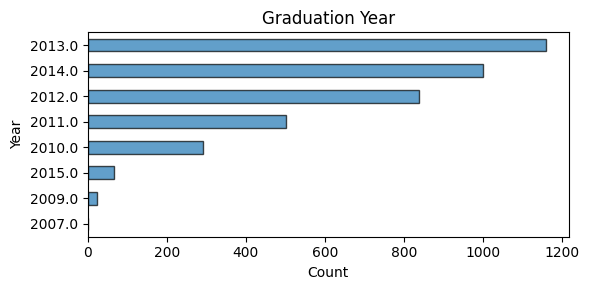

In [108]:
df['GraduationYear'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    title='Graduation Year',
    figsize=(6, 3),
    ec='k',
    alpha=0.7
)
plt.ylabel('Year')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

# Observations

Maximum number of students were graduated in 2013, followed by the year 2014 and 2012.

#Removing outliers

In [109]:
def outlier_treatment(datacolumn):
    Q1, Q3 = np.percentile(datacolumn, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [110]:
columns = ['Salary','10percentage','12percentage','English',
          'Logical','Quant','Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Age', 'Tenure']

In [111]:
df2 = df.copy()


In [114]:
for cols in columns:
    lowerbound, upperbound = outlier_treatment(df2[cols])

    df2 = df2.drop(df2[(df2[cols] < lowerbound) | (df2[cols] > upperbound)].index)

print(f'Number of observation with outliers: {df.shape[0]}')
print(f'Number of observations without outliers: {df2.shape[0]}')

Number of observation with outliers: 3879
Number of observations without outliers: 2189


# Bivariate Analysis

1.1 Average Salary for each Designation



<ipython-input-120-d8b259525425>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='Designation',
<ipython-input-120-d8b259525425>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='Designation',


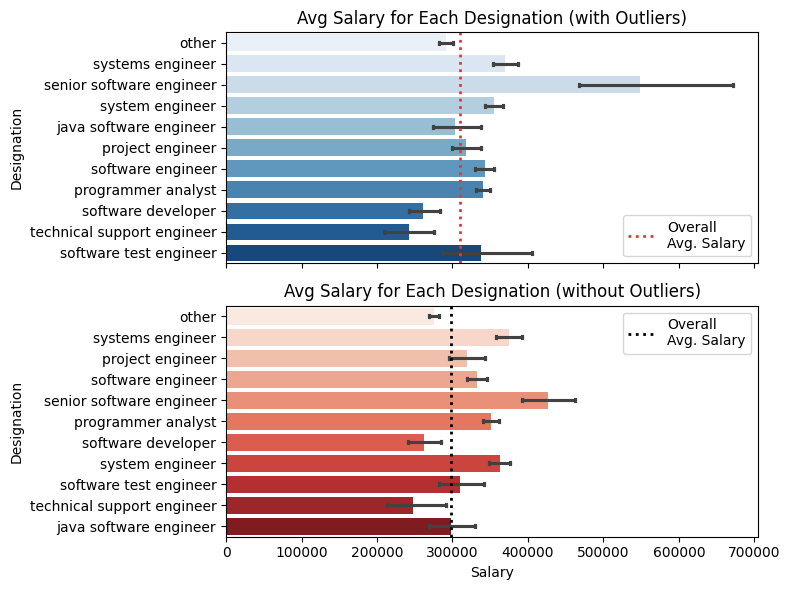

In [120]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.barplot(x='Salary', y='Designation',
            data=df,
            palette='Blues',  # Changed palette to blue
            capsize=0.1,
            ax=ax[0])
ax[0].axvline(df['Salary'].mean(), color='#eb3434',  # Changed color to red
              linestyle=':',
              linewidth=2, label='Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Designation (with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')

sns.barplot(x='Salary', y='Designation',
            data=df2,
            palette='Reds',  # Changed palette to red
            capsize=0.1,
            ax=ax[1])
ax[1].axvline(df2['Salary'].mean(), color='k',
              linestyle=':',
              linewidth=2, label='Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Designation (without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()


# Observations
Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest salary but they also has the maximum standard deviation in their salary. There are only two designations namely, software developer and technical support engineer who has salary lower than average salary.

#1.2 Average Salary for each Gender

<ipython-input-121-dd6f5d5f9006>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='Gender',
<ipython-input-121-dd6f5d5f9006>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Salary', y='Gender',


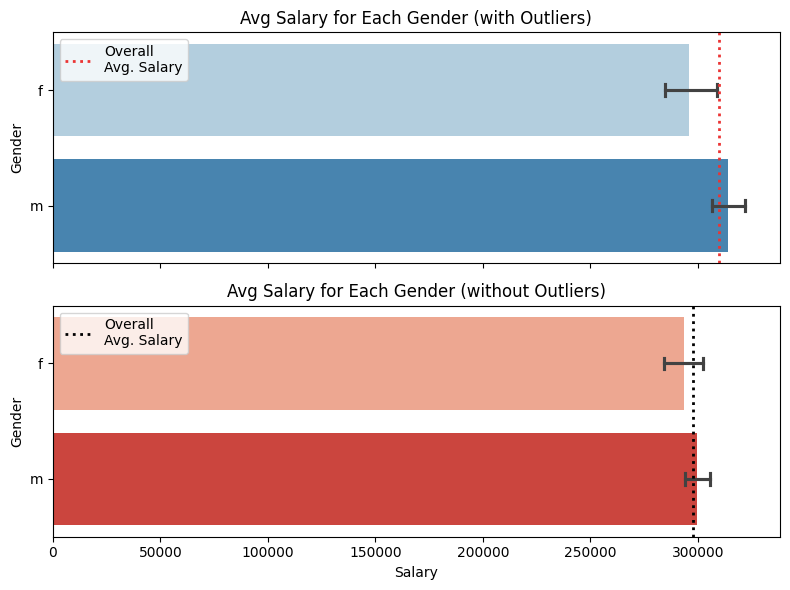

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

sns.barplot(x='Salary', y='Gender',
            data=df,
            palette='Blues',  # Changed palette to blue
            capsize=0.1,
            ax=ax[0])
ax[0].axvline(df['Salary'].mean(), color='#eb3434',  # Changed color to red
              linestyle=':',
              linewidth=2, label='Overall\nAvg. Salary')
ax[0].set_title('Avg Salary for Each Gender (with Outliers)')
ax[0].legend()
ax[0].set_xlabel('')

sns.barplot(x='Salary', y='Gender',
            data=df2,
            palette='Reds',  # Changed palette to red
            capsize=0.1,
            ax=ax[1])
ax[1].axvline(df2['Salary'].mean(), color='k',
              linestyle=':',
              linewidth=2, label='Overall\nAvg. Salary')
ax[1].set_title('Avg Salary for Each Gender (without Outliers)')
ax[1].legend()
ax[1].set_xlabel('Salary')

plt.tight_layout()
plt.show()


#Observations
The average salary for both male and female is approximately equal and it implies that there was no gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall average salary.

# Salary & 10th score


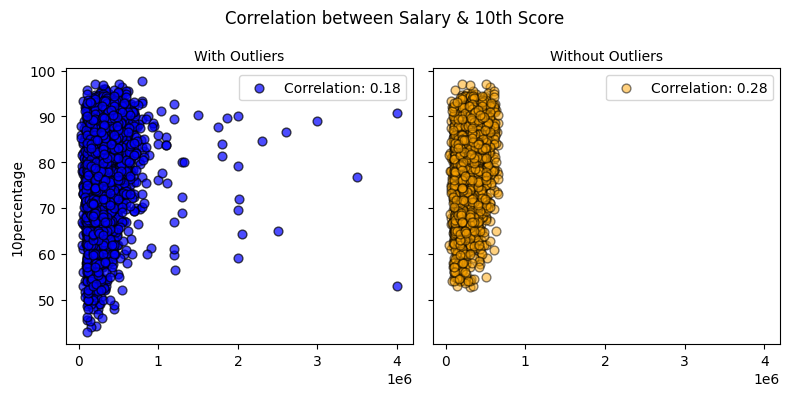

In [122]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax[0].scatter(df['Salary'], df['10percentage'],
              ec='k',
              color='blue',
              alpha=0.7,
              s=40,
              label=f"Correlation: {round(df[['Salary', '10percentage']].corr().iloc[1,0], 2)}"
              )
ax[0].set_ylabel('10percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()

ax[1].scatter(df2['Salary'], df2['10percentage'],
              ec='k',
              color='orange',
              alpha=0.5,
              s=40,
              label=f"Correlation: {round(df2[['Salary', '10percentage']].corr().iloc[1,0], 2)}"
              )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation between Salary & 10th Score', size=12)
plt.tight_layout()
plt.show()


#Salary & 12th score


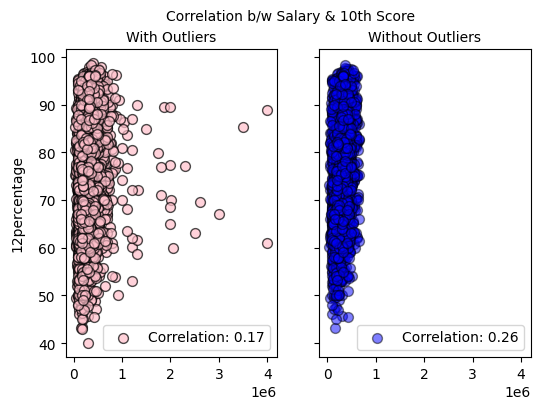

In [123]:
fig, ax = plt.subplots(1, 2, figsize=(6, 4), sharex=True, sharey=True)

ax[0].scatter(df['Salary'], df['12percentage'],
              ec='k',
              color='pink',
              alpha=0.7,
              s=50,
              label=f"Correlation: {round(df[['Salary','12percentage']].corr().iloc[1, 0], 2)}"
              )
ax[0].set_ylabel('12percentage')
ax[0].set_title('With Outliers', size=10)
ax[0].legend()

ax[1].scatter(df2['Salary'], df2['12percentage'],
              ec='k',
              color='blue',
              alpha=0.5,
              s=50,
              label=f"Correlation: {round(df2[['Salary','12percentage']].corr().iloc[1, 0], 2)}"
              )
ax[1].set_title('Without Outliers', size=10)
ax[1].legend()

fig.suptitle('Correlation b/w Salary & 10th Score', size=10)
plt.show()


#Salary & Age

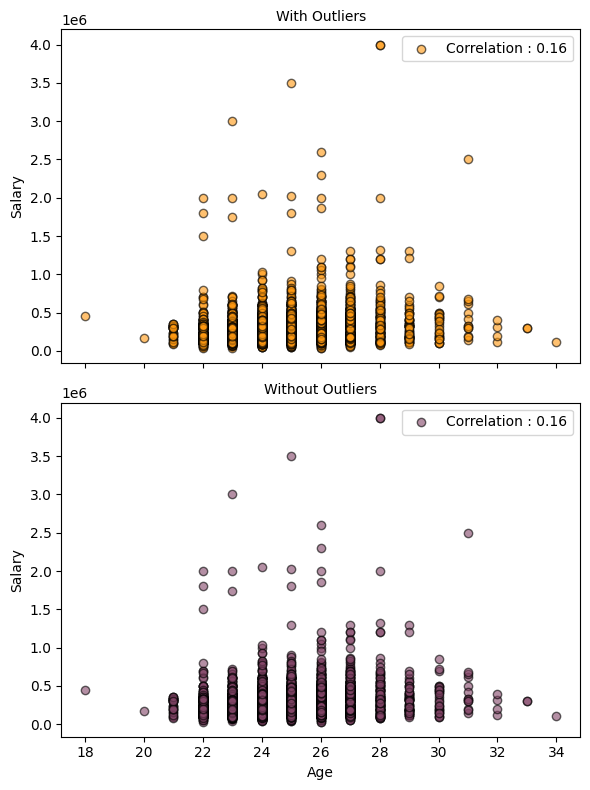

In [125]:
import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)

# Scatter plot with outliers
ax[0].scatter(df['Age'], df['Salary'],
              ec='k',
              color='#ff9911',
              alpha=0.6,
              label=f"Correlation : {round(df[['Age','Salary']].corr().iloc[1,0],2)}"
              )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers', size=10)

# Scatter plot without outliers
ax[1].scatter(df['Age'], df['Salary'],
              ec='k',
              color='#834567',
              alpha=0.6,
              label=f"Correlation : {round(df[['Age','Salary']].corr().iloc[1,0],2)}"
              )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers', size=10)
ax[1].set_xlabel('Age')

plt.tight_layout()
plt.show()


#Salary & Tenure


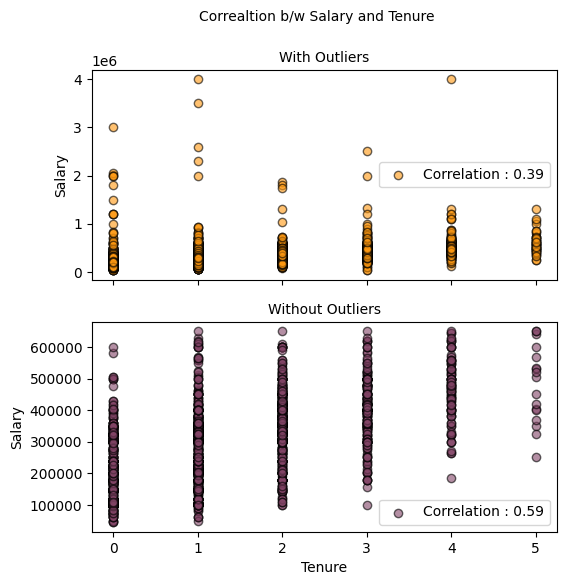

In [127]:

# Create subplots with shared x-axis
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# Scatter plot with outliers
ax[0].scatter(df['Tenure'], df['Salary'],
              ec='k',
              color='#ff9911',
              alpha=0.6,
              label=f"Correlation : {round(df[['Tenure','Salary']].corr().iloc[1,0],2)}"
              )
ax[0].legend()
ax[0].set_ylabel('Salary')
ax[0].set_title('With Outliers', size=10)

# Scatter plot without outliers
ax[1].scatter(df2['Tenure'], df2['Salary'],
              ec='k',
              color='#834567',
              alpha=0.6,
              label=f"Correlation : {round(df2[['Tenure','Salary']].corr().iloc[1,0],2)}"
              )
ax[1].legend()
ax[1].set_ylabel('Salary')
ax[1].set_title('Without Outliers', size=10)
ax[1].set_xlabel('Tenure')

fig.suptitle('Correaltion b/w Salary and Tenure', size=10)

plt.show()


#Salary with English, Quants, Logical

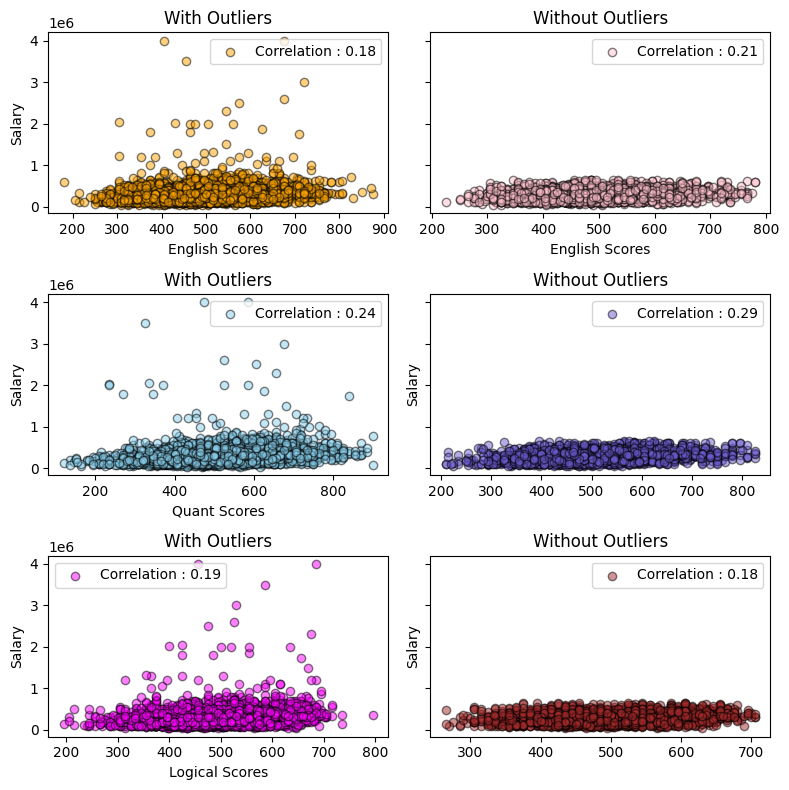

In [129]:
fig, ax = plt.subplots(3, 2, figsize = (8,8), sharey = True)
ax[0,0].scatter(df['English'],df['Salary'],
               ec = 'k',
               color = 'orange',
               alpha = 0.5,
               label = f"Correlation : {round(df[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,0].set_ylabel('Salary')
ax[0,0].set_xlabel('English Scores')
ax[0,0].set_title('With Outliers')
ax[0,0].legend()


ax[0,1].scatter(df2['English'],df2['Salary'],
               ec = 'k',
               color = 'pink',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['English','Salary']].corr().iloc[1,0],2)}"
               )
ax[0,1].set_title('Without Outliers')
ax[0,1].set_xlabel('English Scores')
ax[0,1].legend()




ax[1,0].scatter(df['Quant'],df['Salary'],
               ec = 'k',
               color = 'skyblue',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,0].set_ylabel('Salary')
ax[1,0].set_xlabel('Quant Scores')
ax[1,0].set_title('With Outliers')
ax[1,0].legend()


ax[1,1].scatter(df2['Quant'],df2['Salary'],
               ec = 'k',
               color = 'slateblue',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['Quant','Salary']].corr().iloc[1,0],2)}"
               )
ax[1,1].set_ylabel('Salary')
ax[1,1].set_title('Without Outliers')
ax[1,1].legend()



ax[2,0].scatter(df['Logical'],df['Salary'],
               ec = 'k',
               color = 'magenta',
               alpha = 0.5,
               label = f"Correlation : {round(df[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,0].set_ylabel('Salary')
ax[2,0].set_xlabel('Logical Scores')
ax[2,0].set_title('With Outliers')
ax[2,0].legend()


ax[2,1].scatter(df2['Logical'],df2['Salary'],
               ec = 'k',
               color = 'brown',
               alpha = 0.5,
               label = f"Correlation : {round(df2[['Logical','Salary']].corr().iloc[1,0],2)}"
               )
ax[2,1].set_ylabel('Salary')
ax[2,1].set_title('Without Outliers')
ax[2,1].legend()


plt.tight_layout()
plt.show()

# Gender and Specialization


<Axes: ylabel='Specialization'>

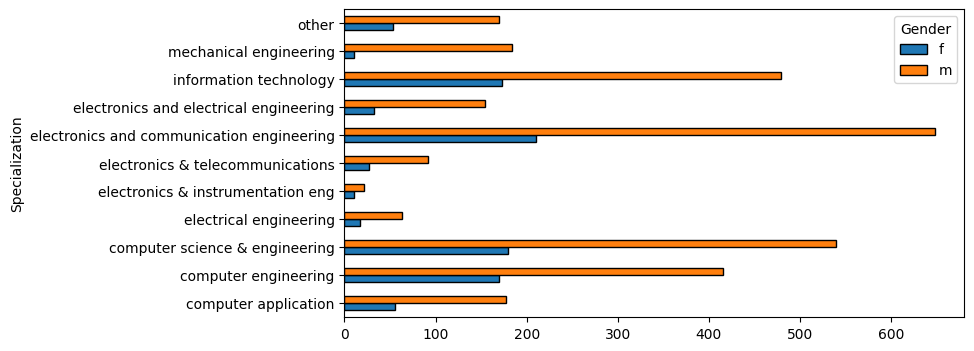

In [130]:
# Plotting the cross-tabulation of Gender and Specialization
df_cross = pd.crosstab(df['Gender'], df['Specialization']).T
df_cross.plot(kind='barh', ec='k', figsize=(8, 4))

#Pivot Tables

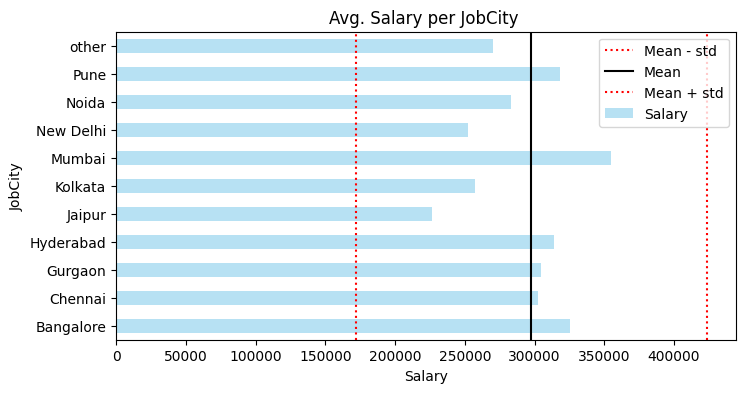

In [132]:
pd.pivot_table(index = 'JobCity',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'skyblue',
                                  title = 'Avg. Salary per JobCity ',
                                  figsize = (8,4))
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

# Average Salary per CollegeTier

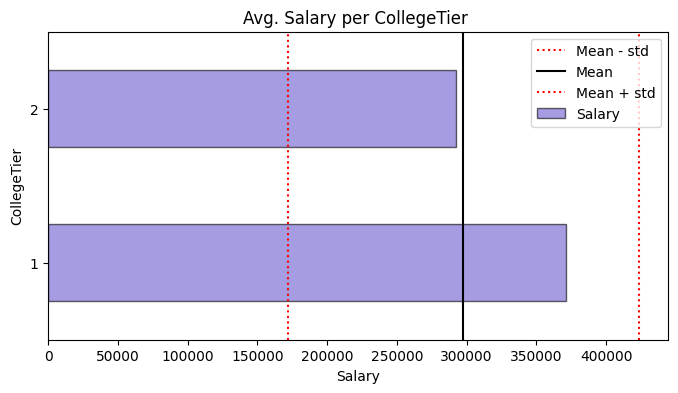

In [133]:
pd.pivot_table(index = 'CollegeTier',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                            alpha = 0.6,
                                  color = 'slateblue',
                                  title = 'Avg. Salary per CollegeTier ',
                                  figsize = (8,4),
                                  ec = 'k')            #edge color
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

#Average Salary per CollegeCityTier

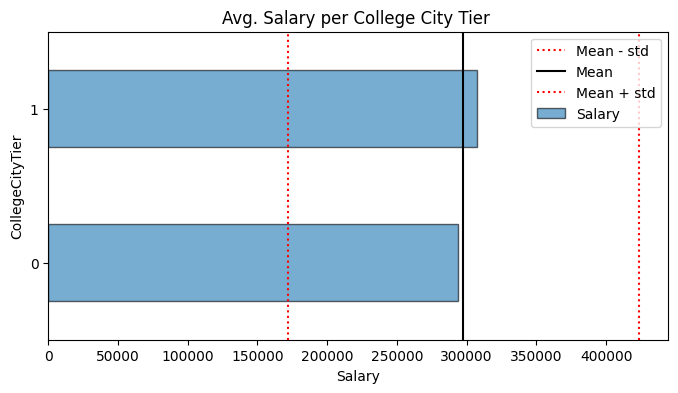

In [135]:
pd.pivot_table(index = 'CollegeCityTier',
              values = 'Salary',
              data = df2).plot(kind = 'barh',
                            alpha = 0.6,
                                  title = 'Avg. Salary per College City Tier ',
                                  figsize = (8,4),
                                  ec = 'k')
plt.xlabel('Salary')
plt.axvline(df2['Salary'].mean() - df2['Salary'].std(),
            color = 'red',
           linestyle = ':',
           label = 'Mean - std')
plt.axvline(df2['Salary'].mean(), color = 'k', label = 'Mean')
plt.axvline(df2['Salary'].mean() + df2['Salary'].std(), color = 'red',
           linestyle = ':',
           label = 'Mean + std')
plt.legend()
plt.show()

#Obervations
Cities under Tier 1 and 2 offers almost same salaries to students.

# Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


In [143]:
df3 = df[(df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (df["Specialization"].isin(["computer science & engineering", "computer engineering"]))]

<ipython-input-144-1b3bff5aee31>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


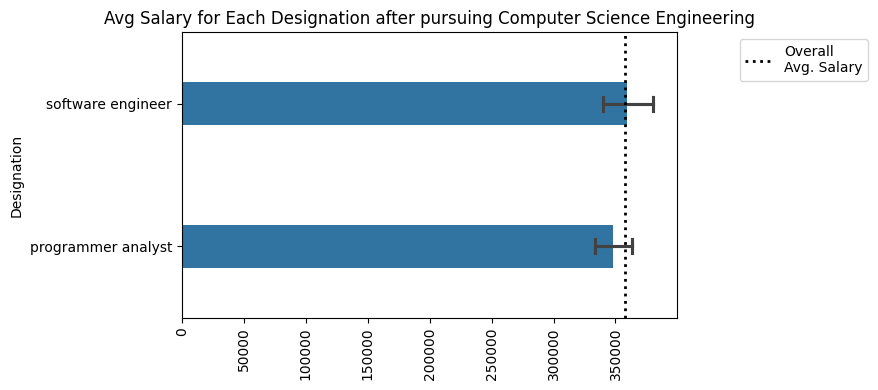

In [144]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(x='Salary', y='Designation',
            data=df3,
            capsize=0.1,
            width=0.3,
            ax=ax)
ax.axvline(df3['Salary'].mean(), color='k',
           linestyle=':',
           linewidth=2, label='Overall\nAvg. Salary')
ax.set_title('Avg Salary for Each Designation after pursuing Computer Science Engineering')
ax.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

# Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


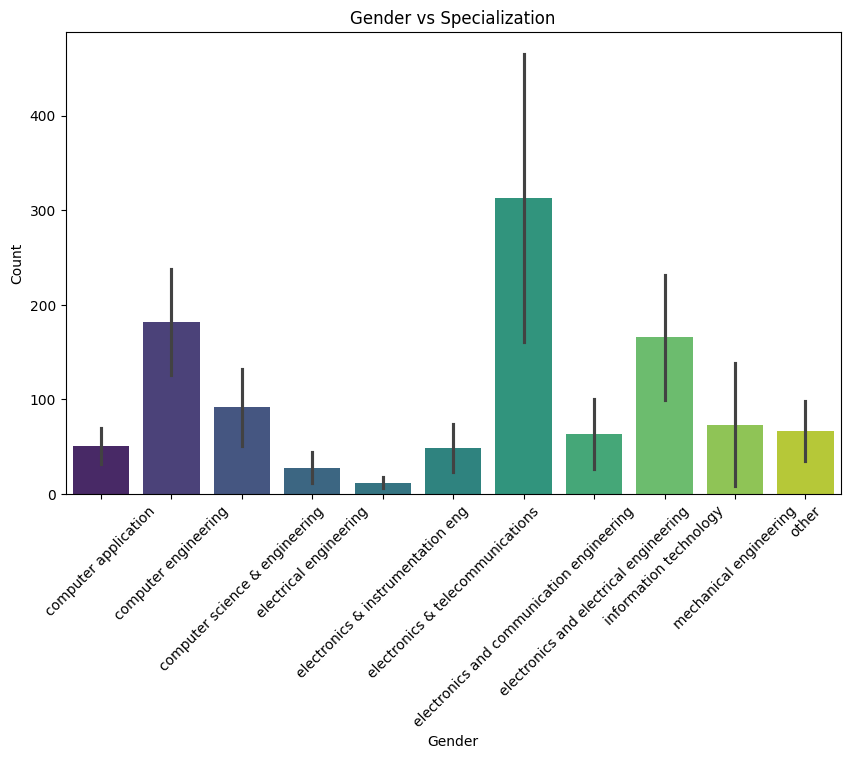

In [146]:
# Create a crosstab to count the occurrences of each combination of gender and specialization
gender_specialization_cross = pd.crosstab(df2['Gender'], df2['Specialization'])

# Plot the crosstab as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_specialization_cross, palette='viridis')
plt.title('Gender vs Specialization')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Conclusion
Data Understanding:

The dataset provides insights into the employment outcomes of engineering graduates, with a focus on the salary variable.
It encompasses standardized scores in cognitive, technical, and personality skills alongside employment-related details.
Data Manipulation:

Initially, the dataset comprises 4000 rows and 40 columns, prompting the need for data cleansing.
Redundant rows and columns are removed, and missing values (NaN) are addressed.
Further data manipulation involves handling duplicate values and preparing the dataset for visualization.
Data Visualization:

Univariate Analysis:

Various plots such as Cumulative Distribution Functions (CDFs), Histograms, Box Plots, and Summary Plots are utilized for univariate analysis.
These visualizations offer insights into probability and frequency distributions within the dataset.


Bivariate Analysis:

Bivariate analysis involves Scatterplots, Barplots, Crosstabs, Pivot tables, and pie charts to compare variables.
It aids in identifying outliers, as demonstrated by Boxplots, and highlights patterns across different categorical variables like Job City.
For example, Countplots help pinpoint outliers within categorical variables such as Job City by emphasizing cities with higher employee counts.  